# Machine Learning Practical: Coursework 1

**Release date: Monday 10th October 2016**  
**Due date: 16:00 Thursday 27th October 2016**

Instructions for the coursework are [available as a PDF here](http://www.inf.ed.ac.uk/teaching/courses/mlp/2016/coursework_1.pdf).

## Part 1: Learning rate schedules

In [45]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider

# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)

# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = MNISTDataProvider('train', batch_size=50, rng=rng)
valid_data = MNISTDataProvider('valid', batch_size=50, rng=rng)

In [2]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.
import numpy as np
import matplotlib.pyplot as plt
import logging
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit

input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()

In [3]:
def train_model_and_plot_stats_with_dynamic_LR(
        free_param, learning_rate,
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval):

    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    schedulers = [TimeDependentLearningRateScheduler(learning_rate, free_param)]
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, schedulers)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Error')
    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    ax_2.set_ylabel('Accuracy')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [4]:
from mlp.learning_rules import GradientDescentLearningRule
from mlp.schedulers import ConstantLearningRateScheduler
from mlp.optimisers import Optimiser
from mlp.schedulers import TimeDependentLearningRateScheduler
from mlp.schedulers import MomentumCoefficientScheduler

%matplotlib inline
plt.style.use('ggplot')


* Different free parameters 

--------------------------------------------------------------------------------
initial_learning_rate=0.10 free_parameter=10000.00
--------------------------------------------------------------------------------


Epoch 5: 0.94s to complete
    error(train)=2.52e-01, acc(train)=9.27e-01, error(valid)=2.39e-01, acc(valid)=9.29e-01
Epoch 10: 0.94s to complete
    error(train)=1.71e-01, acc(train)=9.51e-01, error(valid)=1.70e-01, acc(valid)=9.53e-01
Epoch 15: 0.93s to complete
    error(train)=1.25e-01, acc(train)=9.64e-01, error(valid)=1.36e-01, acc(valid)=9.63e-01
Epoch 20: 0.94s to complete
    error(train)=9.80e-02, acc(train)=9.73e-01, error(valid)=1.18e-01, acc(valid)=9.66e-01
Epoch 25: 0.93s to complete
    error(train)=7.77e-02, acc(train)=9.79e-01, error(valid)=1.05e-01, acc(valid)=9.71e-01
Epoch 30: 1.02s to complete
    error(train)=6.35e-02, acc(train)=9.83e-01, error(valid)=9.76e-02, acc(valid)=9.71e-01
Epoch 35: 1.02s to complete
    error(train)=5.33e-02, acc(train)=9.86e-01, error(valid)=9.62e-02, acc(valid)=9.73e-01
Epoch 40: 0.99s to complete
    error(train)=4.24e-02, acc(train)=9.90e-01, error(valid)=8.87e-02, acc(valid)=9.75e-01
Epoch 45: 0.98s to complete
    error(train)=3.42

error_with_free_param_10000.pdf
error_with_free_param_10000.pdf


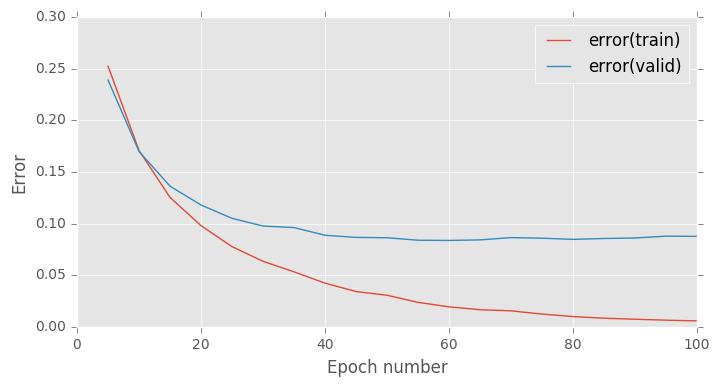

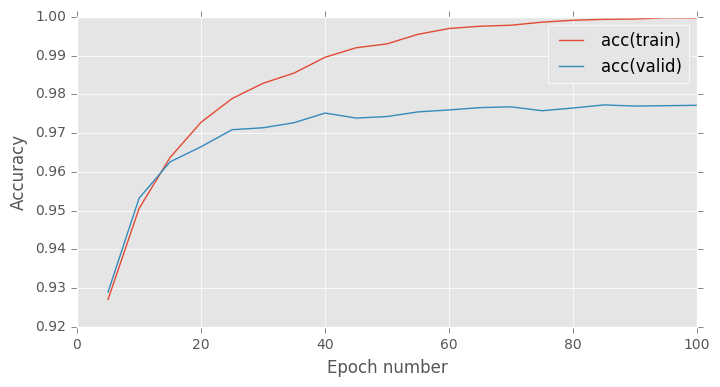

    final error(train) = 5.84e-03
    final error(valid) = 8.76e-02
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.77e-01
    run time per epoch = 1.12s
--------------------------------------------------------------------------------
initial_learning_rate=0.10 free_parameter=50000.00
--------------------------------------------------------------------------------


Epoch 5: 1.13s to complete
    error(train)=2.52e-01, acc(train)=9.27e-01, error(valid)=2.39e-01, acc(valid)=9.29e-01
Epoch 10: 0.94s to complete
    error(train)=1.71e-01, acc(train)=9.51e-01, error(valid)=1.70e-01, acc(valid)=9.53e-01
Epoch 15: 0.93s to complete
    error(train)=1.25e-01, acc(train)=9.64e-01, error(valid)=1.36e-01, acc(valid)=9.63e-01
Epoch 20: 0.94s to complete
    error(train)=9.79e-02, acc(train)=9.73e-01, error(valid)=1.18e-01, acc(valid)=9.66e-01
Epoch 25: 0.94s to complete
    error(train)=7.76e-02, acc(train)=9.79e-01, error(valid)=1.05e-01, acc(valid)=9.71e-01
Epoch 30: 1.02s to complete
    error(train)=6.34e-02, acc(train)=9.83e-01, error(valid)=9.76e-02, acc(valid)=9.71e-01
Epoch 35: 0.96s to complete
    error(train)=5.32e-02, acc(train)=9.86e-01, error(valid)=9.61e-02, acc(valid)=9.73e-01
Epoch 40: 1.10s to complete
    error(train)=4.23e-02, acc(train)=9.90e-01, error(valid)=8.87e-02, acc(valid)=9.75e-01
Epoch 45: 0.95s to complete
    error(train)=3.42

error_with_free_param_50000.pdf
error_with_free_param_50000.pdf


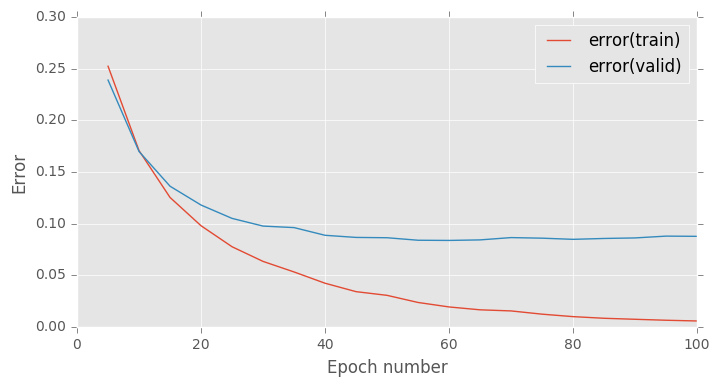

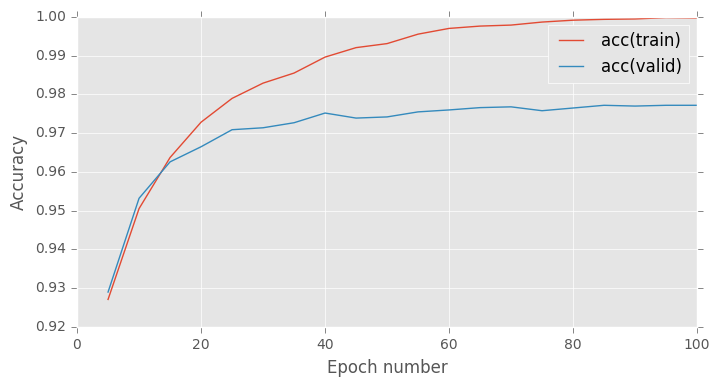

    final error(train) = 5.78e-03
    final error(valid) = 8.77e-02
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.77e-01
    run time per epoch = 1.11s


In [5]:
batch_size = 50  # number of data points in a batch
init_scale = 0.1  # scale for random parameter initialisation
num_epochs = 100 # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats

initial_learning_rate = 0.1  # initial learning rate for gradient descent
free_params = [10000, 50000] # free parameters 

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_train = []
final_accs_valid = []

for free_param in free_params:
    
    print('-' * 80)
    print('initial_learning_rate={0:.2f} free_parameter={1:.2f}'
          .format(initial_learning_rate, free_param))
    print('-' * 80)
    
    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    # Alter data-provider batch size
    train_data.batch_size = batch_size 
    valid_data.batch_size = batch_size

    input_dim, output_dim, hidden_dim = 784, 10, 100

    #Create a parameter initiliser 
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()

    learning_rule = GradientDescentLearningRule(learning_rate=initial_learning_rate)

    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats_with_dynamic_LR(
        free_param, initial_learning_rate,
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval)

    fig1_name = 'error_with_free_param_{:1}.pdf'.format(free_param)
    print fig1_name
    fig2_name = 'acc_with_param_{:1}.pdf'.format(free_param)
    fig_1.savefig(fig1_name)
    fig_2.savefig(fig2_name)
    print fig1_name
    plt.show()
    
    print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
    print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
    print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
    print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
    print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])

* Different initial learning rates

--------------------------------------------------------------------------------
initial_learning_rate=0.001 free_parameter=10.00
--------------------------------------------------------------------------------


Epoch 5: 0.97s to complete
    error(train)=2.25e+00, acc(train)=2.42e-01, error(valid)=2.25e+00, acc(valid)=2.39e-01
Epoch 10: 1.08s to complete
    error(train)=2.23e+00, acc(train)=3.30e-01, error(valid)=2.23e+00, acc(valid)=3.30e-01
Epoch 15: 1.18s to complete
    error(train)=2.21e+00, acc(train)=3.83e-01, error(valid)=2.21e+00, acc(valid)=3.87e-01
Epoch 20: 0.99s to complete
    error(train)=2.19e+00, acc(train)=4.11e-01, error(valid)=2.19e+00, acc(valid)=4.18e-01
Epoch 25: 0.97s to complete
    error(train)=2.19e+00, acc(train)=4.25e-01, error(valid)=2.18e+00, acc(valid)=4.33e-01
Epoch 30: 0.98s to complete
    error(train)=2.18e+00, acc(train)=4.33e-01, error(valid)=2.18e+00, acc(valid)=4.41e-01
Epoch 35: 1.00s to complete
    error(train)=2.18e+00, acc(train)=4.39e-01, error(valid)=2.18e+00, acc(valid)=4.47e-01
Epoch 40: 0.99s to complete
    error(train)=2.18e+00, acc(train)=4.42e-01, error(valid)=2.17e+00, acc(valid)=4.49e-01
Epoch 45: 0.98s to complete
    error(train)=2.17

error_with_init_LR_0.001.pdf
error_with_init_LR_0.001.pdf


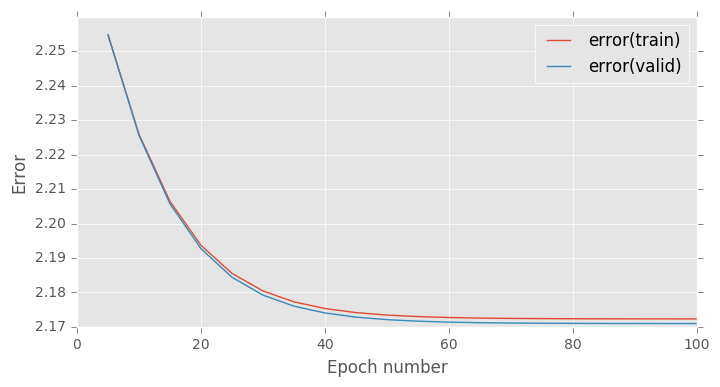

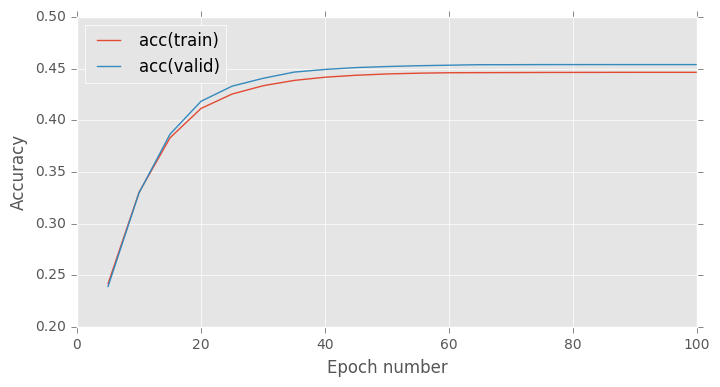

    final error(train) = 2.17e+00
    final error(valid) = 2.17e+00
    final acc(train)   = 4.46e-01
    final acc(valid)   = 4.54e-01
    run time per epoch = 1.14s
--------------------------------------------------------------------------------
initial_learning_rate=0.010 free_parameter=10.00
--------------------------------------------------------------------------------


Epoch 5: 0.95s to complete
    error(train)=1.19e+00, acc(train)=7.09e-01, error(valid)=1.17e+00, acc(valid)=7.37e-01
Epoch 10: 0.97s to complete
    error(train)=7.83e-01, acc(train)=7.99e-01, error(valid)=7.47e-01, acc(valid)=8.22e-01
Epoch 15: 0.93s to complete
    error(train)=6.60e-01, acc(train)=8.25e-01, error(valid)=6.23e-01, acc(valid)=8.42e-01
Epoch 20: 1.09s to complete
    error(train)=6.07e-01, acc(train)=8.37e-01, error(valid)=5.70e-01, acc(valid)=8.53e-01
Epoch 25: 0.97s to complete
    error(train)=5.79e-01, acc(train)=8.45e-01, error(valid)=5.43e-01, acc(valid)=8.60e-01
Epoch 30: 0.96s to complete
    error(train)=5.64e-01, acc(train)=8.49e-01, error(valid)=5.29e-01, acc(valid)=8.63e-01
Epoch 35: 0.93s to complete
    error(train)=5.56e-01, acc(train)=8.51e-01, error(valid)=5.21e-01, acc(valid)=8.65e-01
Epoch 40: 0.94s to complete
    error(train)=5.51e-01, acc(train)=8.52e-01, error(valid)=5.16e-01, acc(valid)=8.66e-01
Epoch 45: 0.93s to complete
    error(train)=5.48

error_with_init_LR_0.01.pdf
error_with_init_LR_0.01.pdf


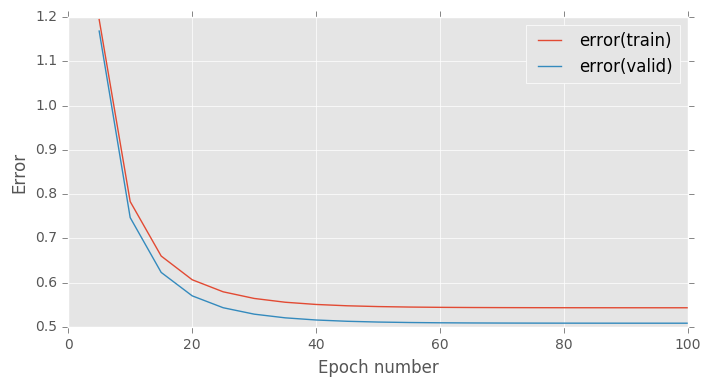

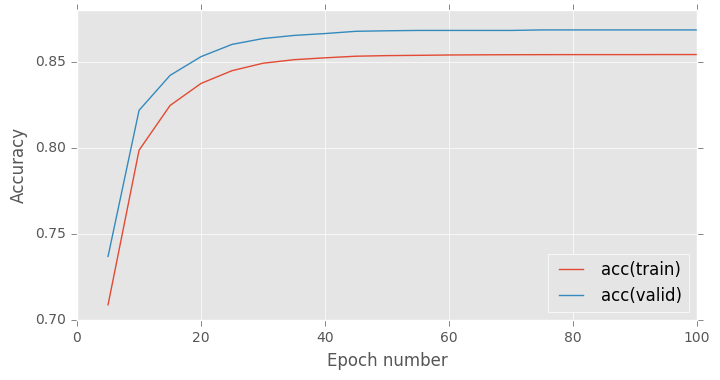

    final error(train) = 5.43e-01
    final error(valid) = 5.08e-01
    final acc(train)   = 8.54e-01
    final acc(valid)   = 8.68e-01
    run time per epoch = 1.11s
--------------------------------------------------------------------------------
initial_learning_rate=0.100 free_parameter=10.00
--------------------------------------------------------------------------------


Epoch 5: 0.98s to complete
    error(train)=2.74e-01, acc(train)=9.21e-01, error(valid)=2.57e-01, acc(valid)=9.25e-01
Epoch 10: 1.03s to complete
    error(train)=2.16e-01, acc(train)=9.37e-01, error(valid)=2.07e-01, acc(valid)=9.41e-01
Epoch 15: 0.98s to complete
    error(train)=1.92e-01, acc(train)=9.44e-01, error(valid)=1.86e-01, acc(valid)=9.48e-01
Epoch 20: 1.03s to complete
    error(train)=1.78e-01, acc(train)=9.49e-01, error(valid)=1.75e-01, acc(valid)=9.51e-01
Epoch 25: 0.99s to complete
    error(train)=1.72e-01, acc(train)=9.51e-01, error(valid)=1.69e-01, acc(valid)=9.54e-01
Epoch 30: 1.01s to complete
    error(train)=1.67e-01, acc(train)=9.52e-01, error(valid)=1.66e-01, acc(valid)=9.54e-01
Epoch 35: 0.93s to complete
    error(train)=1.65e-01, acc(train)=9.53e-01, error(valid)=1.64e-01, acc(valid)=9.54e-01
Epoch 40: 0.95s to complete
    error(train)=1.64e-01, acc(train)=9.53e-01, error(valid)=1.63e-01, acc(valid)=9.55e-01
Epoch 45: 0.95s to complete
    error(train)=1.63

error_with_init_LR_0.1.pdf
error_with_init_LR_0.1.pdf


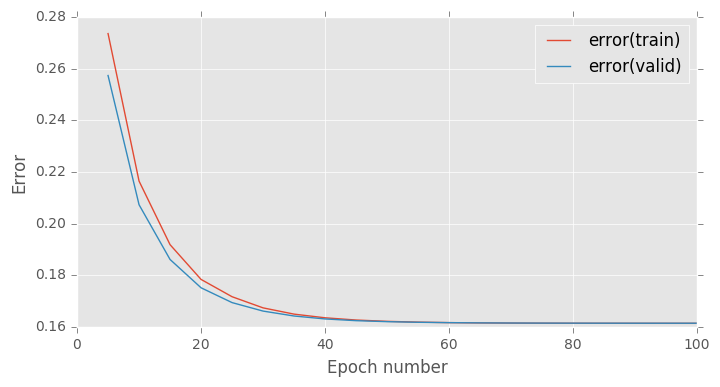

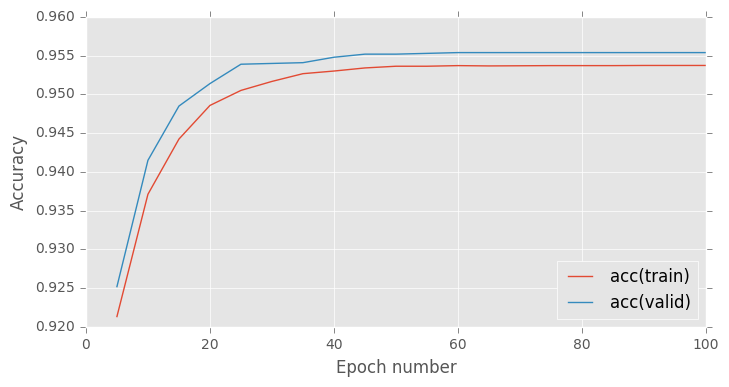

    final error(train) = 1.61e-01
    final error(valid) = 1.61e-01
    final acc(train)   = 9.54e-01
    final acc(valid)   = 9.55e-01
    run time per epoch = 1.12s
--------------------------------------------------------------------------------
initial_learning_rate=0.500 free_parameter=10.00
--------------------------------------------------------------------------------


Epoch 5: 0.96s to complete
    error(train)=1.07e-01, acc(train)=9.69e-01, error(valid)=1.22e-01, acc(valid)=9.65e-01
Epoch 10: 0.93s to complete
    error(train)=6.33e-02, acc(train)=9.82e-01, error(valid)=9.79e-02, acc(valid)=9.72e-01
Epoch 15: 0.97s to complete
    error(train)=4.61e-02, acc(train)=9.88e-01, error(valid)=8.80e-02, acc(valid)=9.74e-01
Epoch 20: 0.94s to complete
    error(train)=3.80e-02, acc(train)=9.91e-01, error(valid)=8.49e-02, acc(valid)=9.74e-01
Epoch 25: 1.04s to complete
    error(train)=3.43e-02, acc(train)=9.92e-01, error(valid)=8.27e-02, acc(valid)=9.75e-01
Epoch 30: 0.95s to complete
    error(train)=3.19e-02, acc(train)=9.93e-01, error(valid)=8.18e-02, acc(valid)=9.76e-01
Epoch 35: 0.93s to complete
    error(train)=3.09e-02, acc(train)=9.93e-01, error(valid)=8.22e-02, acc(valid)=9.75e-01
Epoch 40: 1.12s to complete
    error(train)=2.99e-02, acc(train)=9.94e-01, error(valid)=8.14e-02, acc(valid)=9.76e-01
Epoch 45: 1.01s to complete
    error(train)=2.95

error_with_init_LR_0.5.pdf
error_with_init_LR_0.5.pdf


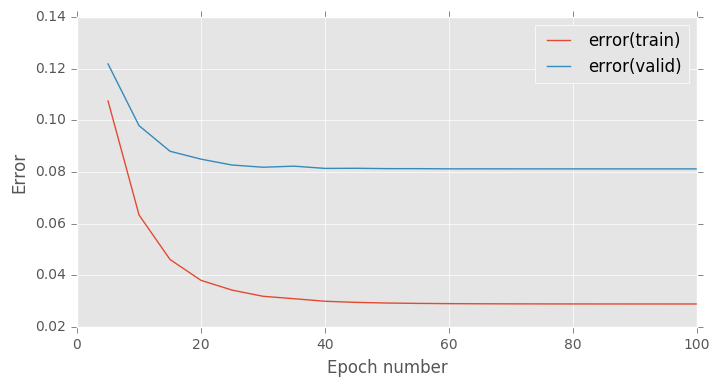

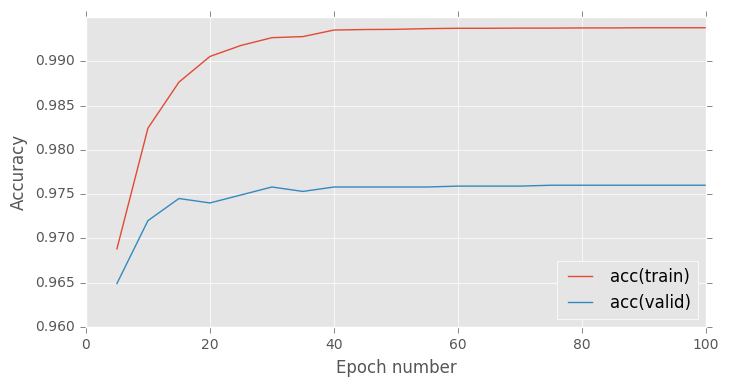

    final error(train) = 2.89e-02
    final error(valid) = 8.12e-02
    final acc(train)   = 9.94e-01
    final acc(valid)   = 9.76e-01
    run time per epoch = 1.13s
--------------------------------------------------------------------------------
initial_learning_rate=1.000 free_parameter=10.00
--------------------------------------------------------------------------------


Epoch 5: 0.95s to complete
    error(train)=6.73e-02, acc(train)=9.80e-01, error(valid)=1.02e-01, acc(valid)=9.70e-01
Epoch 10: 1.02s to complete
    error(train)=2.95e-02, acc(train)=9.93e-01, error(valid)=8.85e-02, acc(valid)=9.76e-01
Epoch 15: 0.94s to complete
    error(train)=1.70e-02, acc(train)=9.97e-01, error(valid)=8.43e-02, acc(valid)=9.76e-01
Epoch 20: 0.94s to complete
    error(train)=1.21e-02, acc(train)=9.98e-01, error(valid)=8.43e-02, acc(valid)=9.77e-01
Epoch 25: 1.07s to complete
    error(train)=1.05e-02, acc(train)=9.99e-01, error(valid)=8.43e-02, acc(valid)=9.77e-01
Epoch 30: 0.93s to complete
    error(train)=9.40e-03, acc(train)=9.99e-01, error(valid)=8.47e-02, acc(valid)=9.77e-01
Epoch 35: 1.10s to complete
    error(train)=8.98e-03, acc(train)=9.99e-01, error(valid)=8.57e-02, acc(valid)=9.77e-01
Epoch 40: 1.03s to complete
    error(train)=8.66e-03, acc(train)=9.99e-01, error(valid)=8.55e-02, acc(valid)=9.77e-01
Epoch 45: 1.01s to complete
    error(train)=8.49

error_with_init_LR_1.0.pdf
error_with_init_LR_1.0.pdf


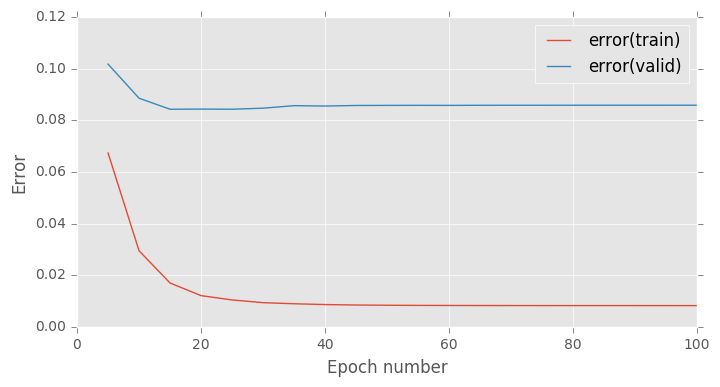

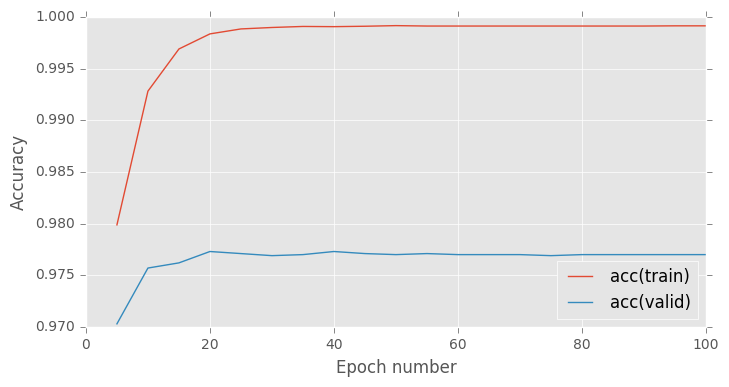

    final error(train) = 8.26e-03
    final error(valid) = 8.58e-02
    final acc(train)   = 9.99e-01
    final acc(valid)   = 9.77e-01
    run time per epoch = 1.12s
--------------------------------------------------------------------------------
initial_learning_rate=10.000 free_parameter=10.00
--------------------------------------------------------------------------------


Epoch 5: 0.97s to complete
    error(train)=1.82e+00, acc(train)=2.54e-01, error(valid)=1.79e+00, acc(valid)=2.63e-01
Epoch 10: 0.95s to complete
    error(train)=2.80e-01, acc(train)=9.29e-01, error(valid)=2.73e-01, acc(valid)=9.35e-01
Epoch 15: 0.98s to complete
    error(train)=1.40e-01, acc(train)=9.62e-01, error(valid)=1.78e-01, acc(valid)=9.53e-01
Epoch 20: 1.05s to complete
    error(train)=9.80e-02, acc(train)=9.74e-01, error(valid)=1.80e-01, acc(valid)=9.58e-01
Epoch 25: 0.93s to complete
    error(train)=6.22e-02, acc(train)=9.85e-01, error(valid)=1.62e-01, acc(valid)=9.62e-01
Epoch 30: 0.97s to complete
    error(train)=5.34e-02, acc(train)=9.88e-01, error(valid)=1.57e-01, acc(valid)=9.64e-01
Epoch 35: 0.93s to complete
    error(train)=5.01e-02, acc(train)=9.89e-01, error(valid)=1.57e-01, acc(valid)=9.64e-01
Epoch 40: 1.05s to complete
    error(train)=4.83e-02, acc(train)=9.89e-01, error(valid)=1.57e-01, acc(valid)=9.65e-01
Epoch 45: 0.98s to complete
    error(train)=4.72

error_with_init_LR_10.pdf
error_with_init_LR_10.pdf


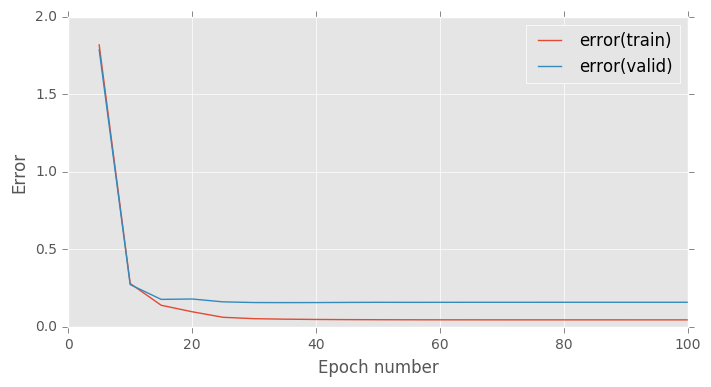

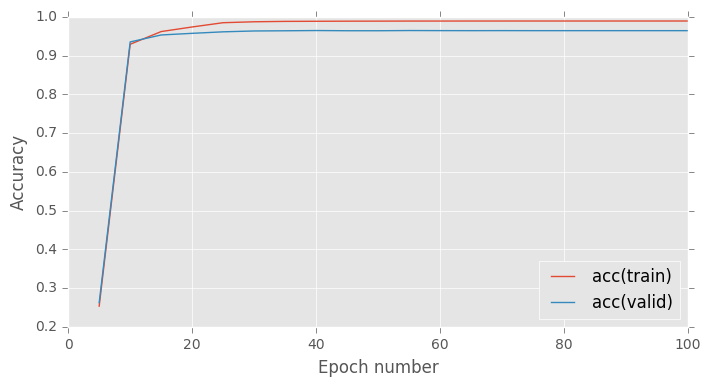

    final error(train) = 4.57e-02
    final error(valid) = 1.59e-01
    final acc(train)   = 9.90e-01
    final acc(valid)   = 9.65e-01
    run time per epoch = 1.09s


In [6]:
batch_size = 50  # number of data points in a batch
init_scale = 0.1  # scale for random parameter initialisation
num_epochs = 100 # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats

initial_learning_rates = [1e-3, 1e-2, 0.1, 0.5, 1., 10]  # initial learning rate for gradient descent
free_param = 10 # free parameters 

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_train = []
final_accs_valid = []

for initial_learning_rate in initial_learning_rates:
    
    print('-' * 80)
    print('initial_learning_rate={0:.3f} free_parameter={1:.2f}'
          .format(initial_learning_rate, free_param))
    print('-' * 80)
    
    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    # Alter data-provider batch size
    train_data.batch_size = batch_size 
    valid_data.batch_size = batch_size

    input_dim, output_dim, hidden_dim = 784, 10, 100

    #Create a parameter initiliser 
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()

    learning_rule = GradientDescentLearningRule(learning_rate=initial_learning_rate)

    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats_with_dynamic_LR(
        free_param, initial_learning_rate,
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval)

    fig1_name = 'error_with_init_LR_{:1}.pdf'.format(initial_learning_rate)
    print fig1_name
    fig2_name = 'acc_with_init_LR_{:1}.pdf'.format(initial_learning_rate)
    fig_1.savefig(fig1_name)
    fig_2.savefig(fig2_name)
    print fig1_name
    plt.show()
    
    print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
    print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
    print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
    print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
    print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])

--------------------------------------------------------------------------------
initial_learning_rate=0.001 free_parameter=50000.00
--------------------------------------------------------------------------------


Epoch 5: 0.97s to complete
    error(train)=2.25e+00, acc(train)=2.75e-01, error(valid)=2.25e+00, acc(valid)=2.77e-01
Epoch 10: 0.93s to complete
    error(train)=2.18e+00, acc(train)=4.28e-01, error(valid)=2.18e+00, acc(valid)=4.35e-01
Epoch 15: 0.94s to complete
    error(train)=2.09e+00, acc(train)=5.37e-01, error(valid)=2.09e+00, acc(valid)=5.51e-01
Epoch 20: 0.94s to complete
    error(train)=1.95e+00, acc(train)=5.81e-01, error(valid)=1.95e+00, acc(valid)=5.97e-01
Epoch 25: 0.94s to complete
    error(train)=1.78e+00, acc(train)=6.15e-01, error(valid)=1.77e+00, acc(valid)=6.34e-01
Epoch 30: 0.94s to complete
    error(train)=1.58e+00, acc(train)=6.50e-01, error(valid)=1.57e+00, acc(valid)=6.74e-01
Epoch 35: 0.93s to complete
    error(train)=1.39e+00, acc(train)=6.74e-01, error(valid)=1.37e+00, acc(valid)=6.99e-01
Epoch 40: 0.94s to complete
    error(train)=1.23e+00, acc(train)=7.00e-01, error(valid)=1.21e+00, acc(valid)=7.25e-01
Epoch 45: 1.07s to complete
    error(train)=1.10

error_with_init_LR_0.001.pdf
error_with_init_LR_0.001.pdf


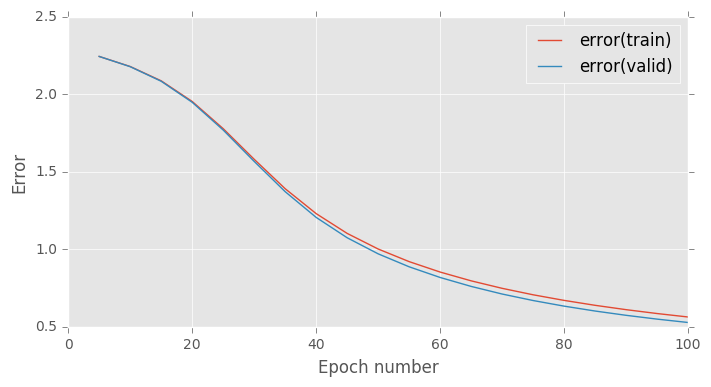

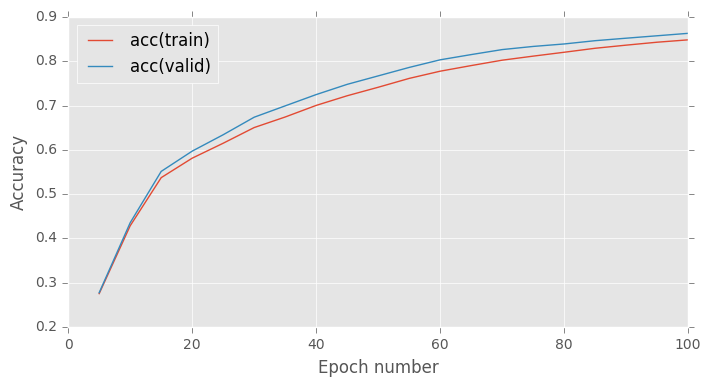

    final error(train) = 5.64e-01
    final error(valid) = 5.29e-01
    final acc(train)   = 8.48e-01
    final acc(valid)   = 8.63e-01
    run time per epoch = 1.10s
--------------------------------------------------------------------------------
initial_learning_rate=0.010 free_parameter=50000.00
--------------------------------------------------------------------------------


Epoch 5: 1.04s to complete
    error(train)=1.00e+00, acc(train)=7.45e-01, error(valid)=9.72e-01, acc(valid)=7.73e-01
Epoch 10: 1.00s to complete
    error(train)=5.65e-01, acc(train)=8.50e-01, error(valid)=5.30e-01, acc(valid)=8.66e-01
Epoch 15: 0.99s to complete
    error(train)=4.27e-01, acc(train)=8.85e-01, error(valid)=3.98e-01, acc(valid)=8.92e-01
Epoch 20: 1.04s to complete
    error(train)=3.66e-01, acc(train)=8.98e-01, error(valid)=3.42e-01, acc(valid)=9.03e-01
Epoch 25: 1.02s to complete
    error(train)=3.33e-01, acc(train)=9.06e-01, error(valid)=3.11e-01, acc(valid)=9.12e-01
Epoch 30: 1.02s to complete
    error(train)=3.10e-01, acc(train)=9.12e-01, error(valid)=2.89e-01, acc(valid)=9.19e-01
Epoch 35: 0.96s to complete
    error(train)=2.91e-01, acc(train)=9.16e-01, error(valid)=2.73e-01, acc(valid)=9.22e-01
Epoch 40: 1.04s to complete
    error(train)=2.76e-01, acc(train)=9.21e-01, error(valid)=2.58e-01, acc(valid)=9.25e-01
Epoch 45: 1.02s to complete
    error(train)=2.61

error_with_init_LR_0.01.pdf
error_with_init_LR_0.01.pdf


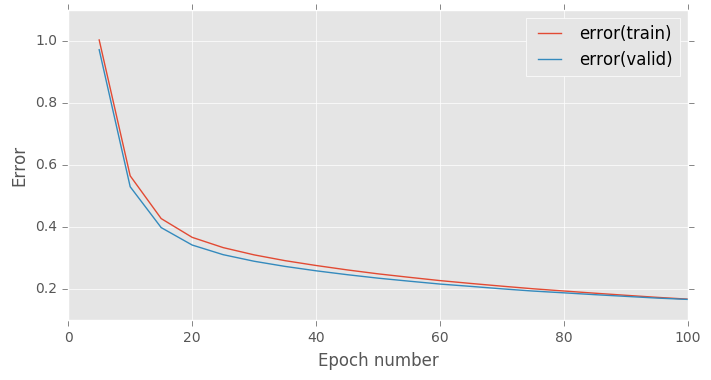

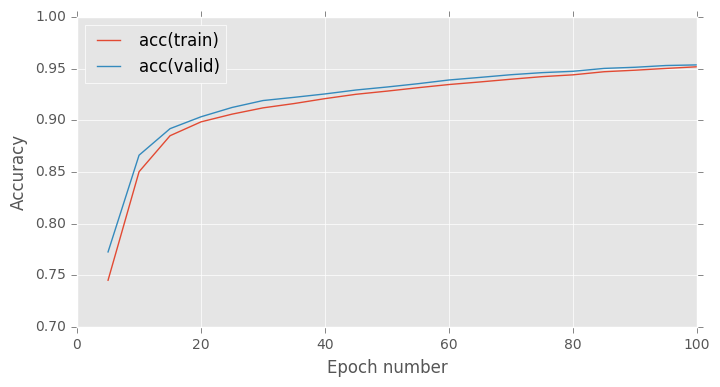

    final error(train) = 1.67e-01
    final error(valid) = 1.66e-01
    final acc(train)   = 9.52e-01
    final acc(valid)   = 9.54e-01
    run time per epoch = 1.12s
--------------------------------------------------------------------------------
initial_learning_rate=0.100 free_parameter=50000.00
--------------------------------------------------------------------------------


Epoch 5: 1.03s to complete
    error(train)=2.52e-01, acc(train)=9.27e-01, error(valid)=2.39e-01, acc(valid)=9.29e-01
Epoch 10: 1.05s to complete
    error(train)=1.71e-01, acc(train)=9.51e-01, error(valid)=1.70e-01, acc(valid)=9.53e-01
Epoch 15: 1.19s to complete
    error(train)=1.25e-01, acc(train)=9.64e-01, error(valid)=1.36e-01, acc(valid)=9.63e-01
Epoch 20: 1.08s to complete
    error(train)=9.79e-02, acc(train)=9.73e-01, error(valid)=1.18e-01, acc(valid)=9.66e-01
Epoch 25: 0.95s to complete
    error(train)=7.76e-02, acc(train)=9.79e-01, error(valid)=1.05e-01, acc(valid)=9.71e-01
Epoch 30: 0.98s to complete
    error(train)=6.34e-02, acc(train)=9.83e-01, error(valid)=9.76e-02, acc(valid)=9.71e-01
Epoch 35: 0.99s to complete
    error(train)=5.32e-02, acc(train)=9.86e-01, error(valid)=9.61e-02, acc(valid)=9.73e-01
Epoch 40: 0.94s to complete
    error(train)=4.23e-02, acc(train)=9.90e-01, error(valid)=8.87e-02, acc(valid)=9.75e-01
Epoch 45: 1.06s to complete
    error(train)=3.42

error_with_init_LR_0.1.pdf
error_with_init_LR_0.1.pdf


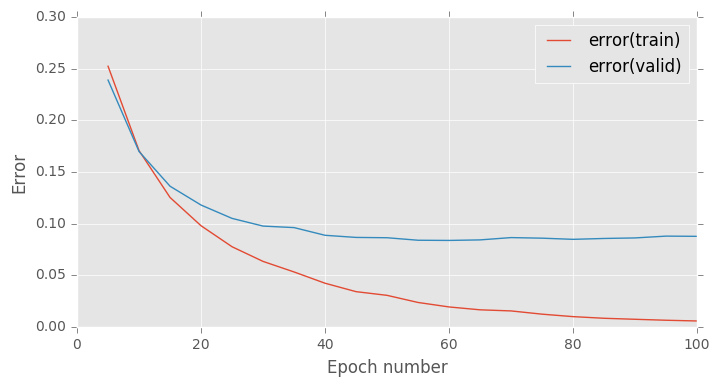

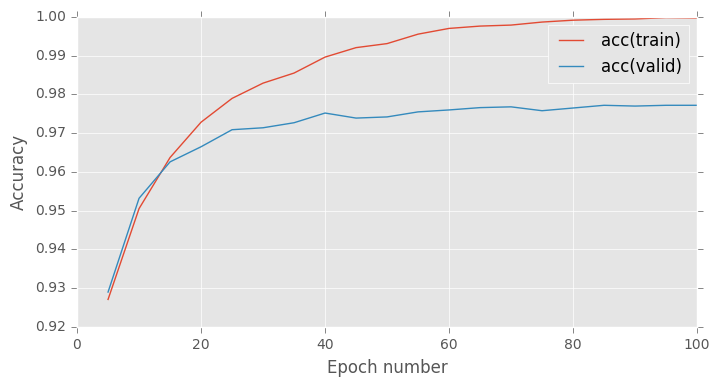

    final error(train) = 5.78e-03
    final error(valid) = 8.77e-02
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.77e-01
    run time per epoch = 1.13s
--------------------------------------------------------------------------------
initial_learning_rate=0.500 free_parameter=50000.00
--------------------------------------------------------------------------------


Epoch 5: 0.93s to complete
    error(train)=9.77e-02, acc(train)=9.71e-01, error(valid)=1.17e-01, acc(valid)=9.66e-01
Epoch 10: 0.93s to complete
    error(train)=4.60e-02, acc(train)=9.87e-01, error(valid)=9.29e-02, acc(valid)=9.73e-01
Epoch 15: 0.93s to complete
    error(train)=2.17e-02, acc(train)=9.95e-01, error(valid)=8.28e-02, acc(valid)=9.77e-01
Epoch 20: 0.98s to complete
    error(train)=1.04e-02, acc(train)=9.98e-01, error(valid)=8.44e-02, acc(valid)=9.77e-01
Epoch 25: 0.96s to complete
    error(train)=5.32e-03, acc(train)=1.00e+00, error(valid)=8.38e-02, acc(valid)=9.78e-01
Epoch 30: 1.00s to complete
    error(train)=2.98e-03, acc(train)=1.00e+00, error(valid)=8.84e-02, acc(valid)=9.78e-01
Epoch 35: 0.95s to complete
    error(train)=2.12e-03, acc(train)=1.00e+00, error(valid)=9.19e-02, acc(valid)=9.78e-01
Epoch 40: 0.97s to complete
    error(train)=1.44e-03, acc(train)=1.00e+00, error(valid)=9.23e-02, acc(valid)=9.78e-01
Epoch 45: 0.96s to complete
    error(train)=1.16

error_with_init_LR_0.5.pdf
error_with_init_LR_0.5.pdf


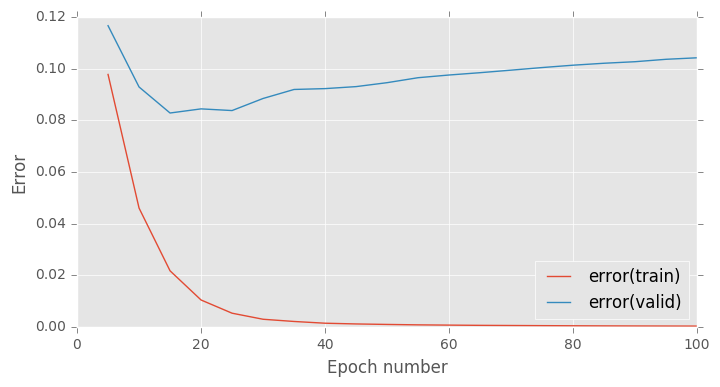

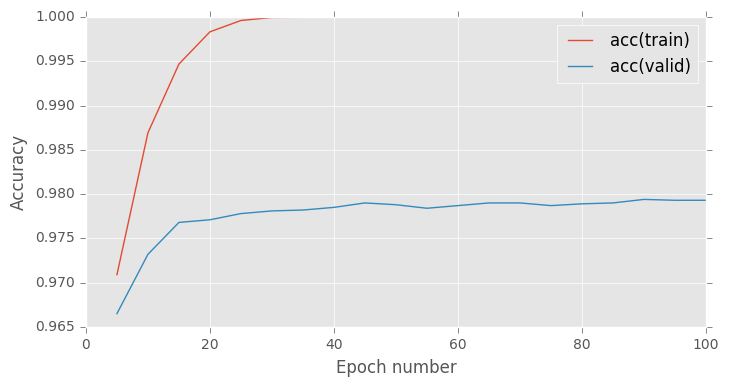

    final error(train) = 3.27e-04
    final error(valid) = 1.04e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.79e-01
    run time per epoch = 1.10s
--------------------------------------------------------------------------------
initial_learning_rate=1.000 free_parameter=50000.00
--------------------------------------------------------------------------------


Epoch 5: 0.94s to complete
    error(train)=6.70e-02, acc(train)=9.79e-01, error(valid)=1.05e-01, acc(valid)=9.69e-01
Epoch 10: 0.95s to complete
    error(train)=2.73e-02, acc(train)=9.92e-01, error(valid)=1.00e-01, acc(valid)=9.73e-01
Epoch 15: 0.96s to complete
    error(train)=7.93e-03, acc(train)=9.98e-01, error(valid)=9.35e-02, acc(valid)=9.75e-01
Epoch 20: 0.93s to complete
    error(train)=2.12e-03, acc(train)=1.00e+00, error(valid)=9.69e-02, acc(valid)=9.78e-01
Epoch 25: 0.98s to complete
    error(train)=1.10e-03, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.78e-01
Epoch 30: 0.93s to complete
    error(train)=7.47e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.78e-01
Epoch 35: 0.93s to complete
    error(train)=5.91e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.78e-01
Epoch 40: 0.93s to complete
    error(train)=4.74e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.78e-01
Epoch 45: 0.93s to complete
    error(train)=4.01

error_with_init_LR_1.0.pdf
error_with_init_LR_1.0.pdf


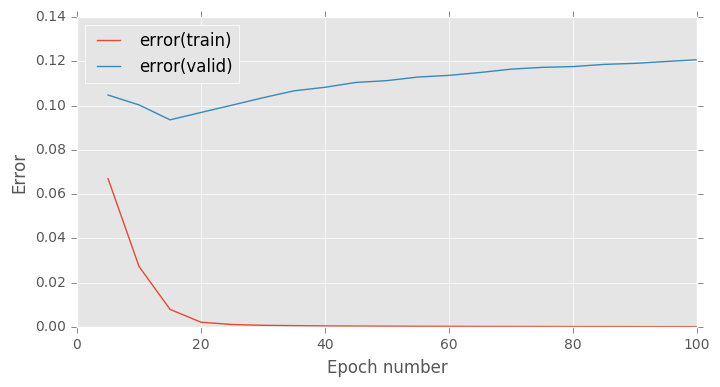

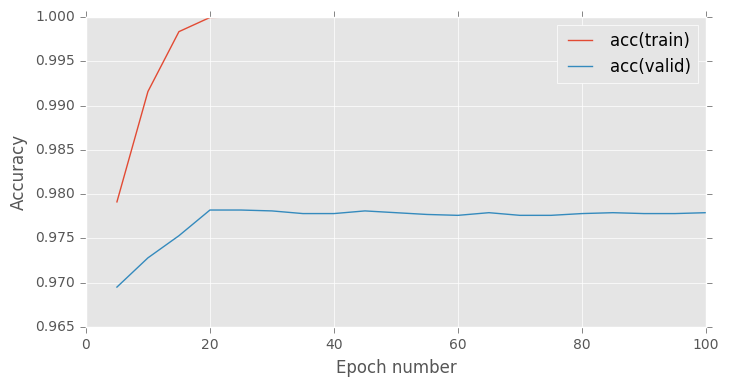

    final error(train) = 1.34e-04
    final error(valid) = 1.21e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.78e-01
    run time per epoch = 1.10s
--------------------------------------------------------------------------------
initial_learning_rate=10.000 free_parameter=50000.00
--------------------------------------------------------------------------------


Epoch 5: 1.00s to complete
    error(train)=2.09e+00, acc(train)=1.72e-01, error(valid)=2.07e+00, acc(valid)=1.81e-01
Epoch 10: 1.07s to complete
    error(train)=2.18e+00, acc(train)=1.94e-01, error(valid)=2.17e+00, acc(valid)=2.00e-01
Epoch 15: 0.97s to complete
    error(train)=1.86e+00, acc(train)=2.08e-01, error(valid)=1.85e+00, acc(valid)=1.99e-01
Epoch 20: 0.95s to complete
    error(train)=2.05e+00, acc(train)=1.97e-01, error(valid)=2.04e+00, acc(valid)=1.94e-01
Epoch 25: 1.12s to complete
    error(train)=1.91e+00, acc(train)=1.89e-01, error(valid)=1.90e+00, acc(valid)=1.91e-01
Epoch 30: 0.97s to complete
    error(train)=2.05e+00, acc(train)=1.91e-01, error(valid)=2.05e+00, acc(valid)=1.94e-01
Epoch 35: 1.01s to complete
    error(train)=2.02e+00, acc(train)=2.00e-01, error(valid)=2.00e+00, acc(valid)=2.06e-01
Epoch 40: 0.96s to complete
    error(train)=2.07e+00, acc(train)=2.09e-01, error(valid)=2.07e+00, acc(valid)=2.02e-01
Epoch 45: 0.95s to complete
    error(train)=1.86

error_with_init_LR_10.pdf
error_with_init_LR_10.pdf


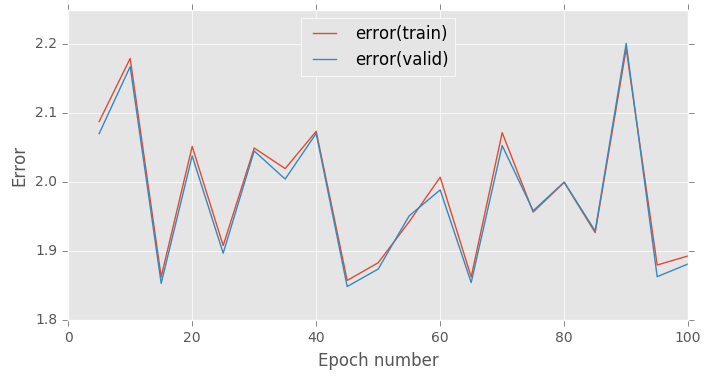

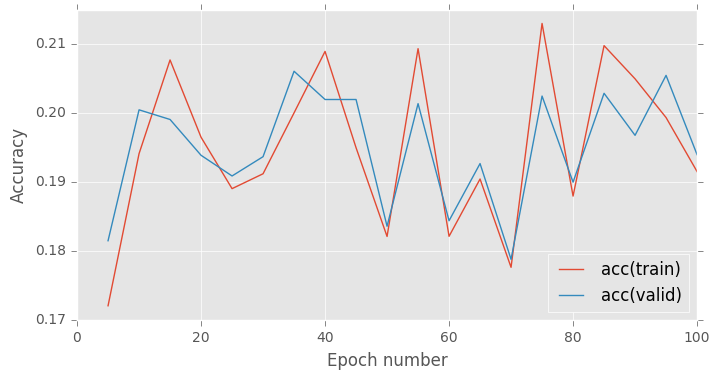

    final error(train) = 1.89e+00
    final error(valid) = 1.88e+00
    final acc(train)   = 1.92e-01
    final acc(valid)   = 1.94e-01
    run time per epoch = 1.14s


In [6]:
batch_size = 50  # number of data points in a batch
init_scale = 0.1  # scale for random parameter initialisation
num_epochs = 100 # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats

initial_learning_rates = [1e-3, 1e-2, 0.1, 0.5, 1., 10]  # initial learning rate for gradient descent
free_param = 5.0e+4 # free parameters 

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_train = []
final_accs_valid = []

for initial_learning_rate in initial_learning_rates:
    
    print('-' * 80)
    print('initial_learning_rate={0:.3f} free_parameter={1:.2f}'
          .format(initial_learning_rate, free_param))
    print('-' * 80)
    
    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    # Alter data-provider batch size
    train_data.batch_size = batch_size 
    valid_data.batch_size = batch_size

    input_dim, output_dim, hidden_dim = 784, 10, 100

    #Create a parameter initiliser 
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()

    learning_rule = GradientDescentLearningRule(learning_rate=initial_learning_rate)

    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats_with_dynamic_LR(
        free_param, initial_learning_rate,
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval)

    fig1_name = 'error_with_init_LR_{:1}.pdf'.format(initial_learning_rate)
    print fig1_name
    fig2_name = 'acc_with_init_LR_{:1}.pdf'.format(initial_learning_rate)
    fig_1.savefig(fig1_name)
    fig_2.savefig(fig2_name)
    print fig1_name
    plt.show()
    
    print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
    print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
    print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
    print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
    print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])

* Constant learning rate

In [8]:
def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval):

    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Error')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    ax_2.set_ylabel('Accuracy')   
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

--------------------------------------------------------------------------------
learning_rate=0.010 
--------------------------------------------------------------------------------


Epoch 5: 0.93s to complete
    error(train)=1.00e+00, acc(train)=7.37e-01, error(valid)=9.73e-01, acc(valid)=7.63e-01
Epoch 10: 0.93s to complete
    error(train)=5.64e-01, acc(train)=8.48e-01, error(valid)=5.29e-01, acc(valid)=8.63e-01
Epoch 15: 0.93s to complete
    error(train)=4.27e-01, acc(train)=8.84e-01, error(valid)=3.98e-01, acc(valid)=8.92e-01
Epoch 20: 1.01s to complete
    error(train)=3.66e-01, acc(train)=8.98e-01, error(valid)=3.42e-01, acc(valid)=9.03e-01
Epoch 25: 1.29s to complete
    error(train)=3.33e-01, acc(train)=9.06e-01, error(valid)=3.11e-01, acc(valid)=9.12e-01
Epoch 30: 1.08s to complete
    error(train)=3.10e-01, acc(train)=9.12e-01, error(valid)=2.90e-01, acc(valid)=9.19e-01
Epoch 35: 1.25s to complete
    error(train)=2.91e-01, acc(train)=9.16e-01, error(valid)=2.73e-01, acc(valid)=9.22e-01
Epoch 40: 1.20s to complete
    error(train)=2.75e-01, acc(train)=9.21e-01, error(valid)=2.58e-01, acc(valid)=9.26e-01
Epoch 45: 1.04s to complete
    error(train)=2.61

error_with_const_LR_0.01.pdf
error_with_const_LR_0.01.pdf


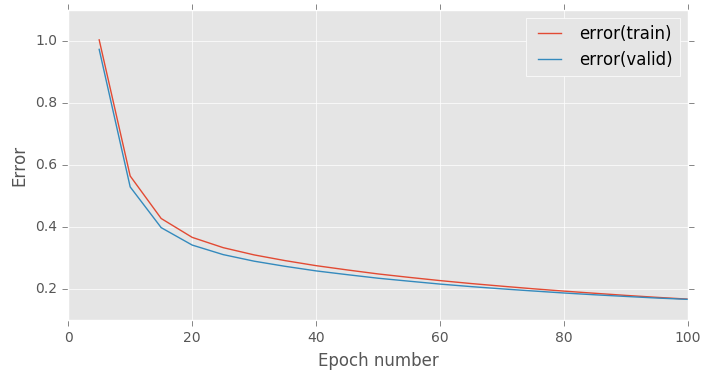

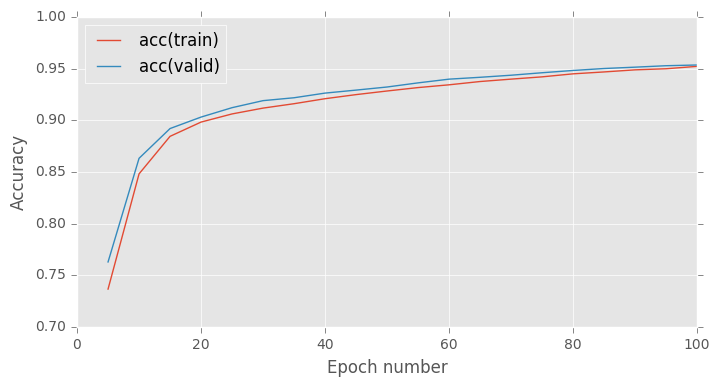

    final error(train) = 1.67e-01
    final error(valid) = 1.66e-01
    final acc(train)   = 9.52e-01
    final acc(valid)   = 9.53e-01
    run time per epoch = 1.18s
--------------------------------------------------------------------------------
learning_rate=0.050 
--------------------------------------------------------------------------------


Epoch 5: 1.00s to complete
    error(train)=3.36e-01, acc(train)=9.04e-01, error(valid)=3.14e-01, acc(valid)=9.09e-01
Epoch 10: 0.96s to complete
    error(train)=2.50e-01, acc(train)=9.27e-01, error(valid)=2.37e-01, acc(valid)=9.32e-01
Epoch 15: 0.97s to complete
    error(train)=2.04e-01, acc(train)=9.41e-01, error(valid)=1.95e-01, acc(valid)=9.46e-01
Epoch 20: 0.96s to complete
    error(train)=1.68e-01, acc(train)=9.52e-01, error(valid)=1.67e-01, acc(valid)=9.53e-01
Epoch 25: 0.94s to complete
    error(train)=1.45e-01, acc(train)=9.58e-01, error(valid)=1.50e-01, acc(valid)=9.58e-01
Epoch 30: 0.93s to complete
    error(train)=1.23e-01, acc(train)=9.64e-01, error(valid)=1.33e-01, acc(valid)=9.63e-01
Epoch 35: 0.93s to complete
    error(train)=1.07e-01, acc(train)=9.70e-01, error(valid)=1.22e-01, acc(valid)=9.66e-01
Epoch 40: 0.93s to complete
    error(train)=9.53e-02, acc(train)=9.74e-01, error(valid)=1.15e-01, acc(valid)=9.68e-01
Epoch 45: 0.93s to complete
    error(train)=8.38

error_with_const_LR_0.05.pdf
error_with_const_LR_0.05.pdf


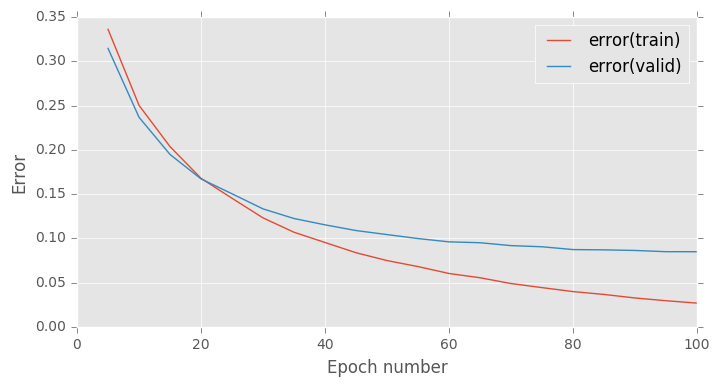

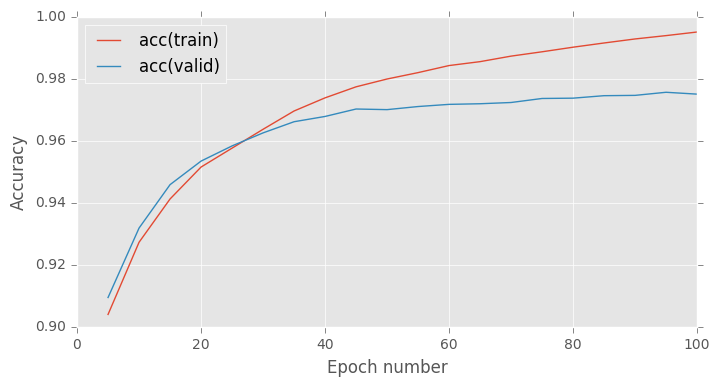

    final error(train) = 2.69e-02
    final error(valid) = 8.49e-02
    final acc(train)   = 9.95e-01
    final acc(valid)   = 9.75e-01
    run time per epoch = 1.09s
--------------------------------------------------------------------------------
learning_rate=0.100 
--------------------------------------------------------------------------------


Epoch 5: 0.95s to complete
    error(train)=2.54e-01, acc(train)=9.26e-01, error(valid)=2.41e-01, acc(valid)=9.30e-01
Epoch 10: 0.93s to complete
    error(train)=1.70e-01, acc(train)=9.51e-01, error(valid)=1.69e-01, acc(valid)=9.54e-01
Epoch 15: 0.94s to complete
    error(train)=1.27e-01, acc(train)=9.63e-01, error(valid)=1.34e-01, acc(valid)=9.62e-01
Epoch 20: 0.95s to complete
    error(train)=9.60e-02, acc(train)=9.73e-01, error(valid)=1.17e-01, acc(valid)=9.68e-01
Epoch 25: 0.95s to complete
    error(train)=8.15e-02, acc(train)=9.77e-01, error(valid)=1.11e-01, acc(valid)=9.68e-01
Epoch 30: 0.95s to complete
    error(train)=6.22e-02, acc(train)=9.83e-01, error(valid)=9.73e-02, acc(valid)=9.71e-01
Epoch 35: 0.94s to complete
    error(train)=5.06e-02, acc(train)=9.87e-01, error(valid)=9.27e-02, acc(valid)=9.73e-01
Epoch 40: 0.93s to complete
    error(train)=4.33e-02, acc(train)=9.89e-01, error(valid)=9.09e-02, acc(valid)=9.73e-01
Epoch 45: 0.95s to complete
    error(train)=3.42

error_with_const_LR_0.1.pdf
error_with_const_LR_0.1.pdf


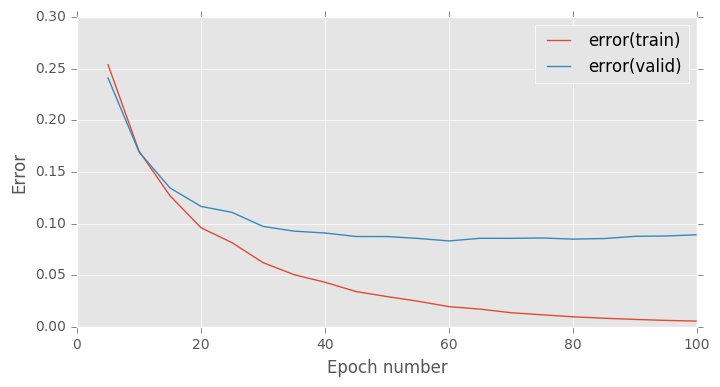

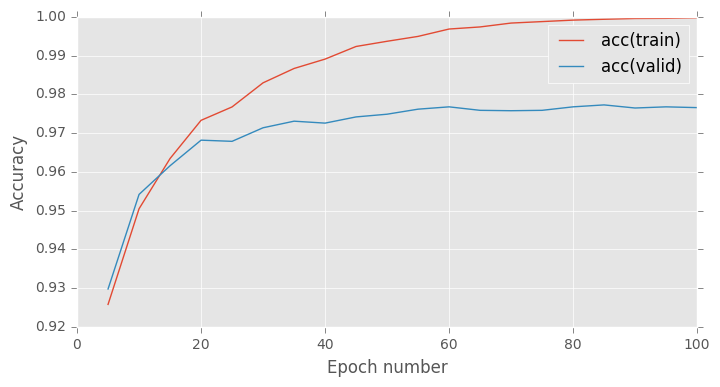

    final error(train) = 5.64e-03
    final error(valid) = 8.92e-02
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.77e-01
    run time per epoch = 1.10s
--------------------------------------------------------------------------------
learning_rate=0.500 
--------------------------------------------------------------------------------


Epoch 5: 1.05s to complete
    error(train)=9.79e-02, acc(train)=9.71e-01, error(valid)=1.18e-01, acc(valid)=9.66e-01
Epoch 10: 0.93s to complete
    error(train)=4.92e-02, acc(train)=9.85e-01, error(valid)=1.00e-01, acc(valid)=9.71e-01
Epoch 15: 0.94s to complete
    error(train)=2.36e-02, acc(train)=9.94e-01, error(valid)=8.42e-02, acc(valid)=9.74e-01
Epoch 20: 0.97s to complete
    error(train)=1.74e-02, acc(train)=9.95e-01, error(valid)=9.54e-02, acc(valid)=9.75e-01
Epoch 25: 0.96s to complete
    error(train)=1.24e-02, acc(train)=9.97e-01, error(valid)=1.02e-01, acc(valid)=9.73e-01
Epoch 30: 0.98s to complete
    error(train)=3.01e-03, acc(train)=1.00e+00, error(valid)=9.18e-02, acc(valid)=9.77e-01
Epoch 35: 0.97s to complete
    error(train)=1.92e-03, acc(train)=1.00e+00, error(valid)=9.50e-02, acc(valid)=9.78e-01
Epoch 40: 0.95s to complete
    error(train)=1.51e-03, acc(train)=1.00e+00, error(valid)=9.57e-02, acc(valid)=9.78e-01
Epoch 45: 0.94s to complete
    error(train)=1.16

error_with_const_LR_0.5.pdf
error_with_const_LR_0.5.pdf


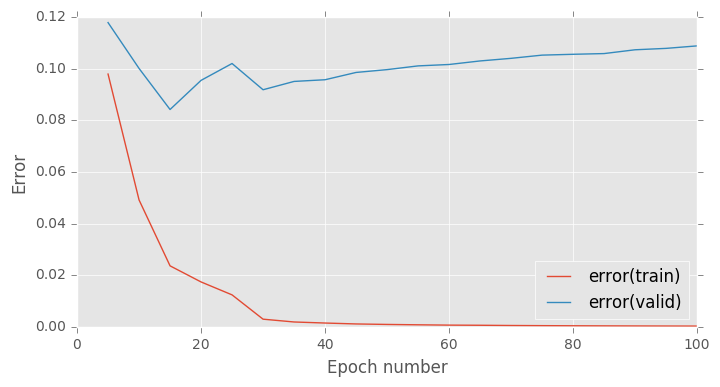

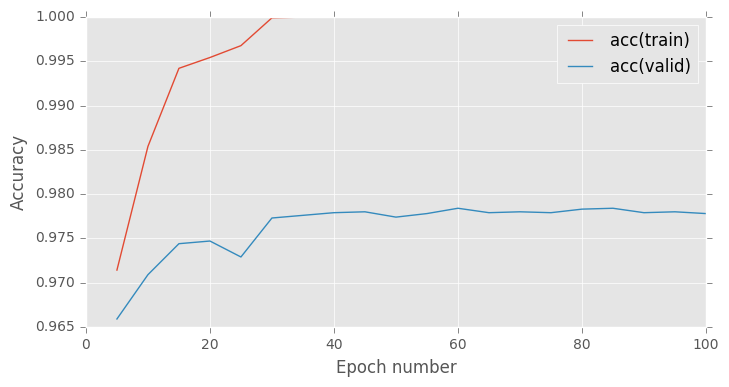

    final error(train) = 3.33e-04
    final error(valid) = 1.09e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.78e-01
    run time per epoch = 1.11s
--------------------------------------------------------------------------------
learning_rate=1.000 
--------------------------------------------------------------------------------


Epoch 5: 0.94s to complete
    error(train)=6.66e-02, acc(train)=9.80e-01, error(valid)=1.02e-01, acc(valid)=9.69e-01
Epoch 10: 0.93s to complete
    error(train)=3.97e-02, acc(train)=9.87e-01, error(valid)=1.10e-01, acc(valid)=9.70e-01
Epoch 15: 0.93s to complete
    error(train)=8.00e-03, acc(train)=9.99e-01, error(valid)=7.95e-02, acc(valid)=9.78e-01
Epoch 20: 0.93s to complete
    error(train)=2.42e-03, acc(train)=1.00e+00, error(valid)=8.65e-02, acc(valid)=9.79e-01
Epoch 25: 0.93s to complete
    error(train)=2.30e-03, acc(train)=1.00e+00, error(valid)=9.28e-02, acc(valid)=9.78e-01
Epoch 30: 0.93s to complete
    error(train)=8.39e-04, acc(train)=1.00e+00, error(valid)=9.19e-02, acc(valid)=9.79e-01
Epoch 35: 0.94s to complete
    error(train)=6.32e-04, acc(train)=1.00e+00, error(valid)=9.53e-02, acc(valid)=9.78e-01
Epoch 40: 0.94s to complete
    error(train)=5.03e-04, acc(train)=1.00e+00, error(valid)=9.58e-02, acc(valid)=9.79e-01
Epoch 45: 0.94s to complete
    error(train)=4.19

error_with_const_LR_1.0.pdf
error_with_const_LR_1.0.pdf


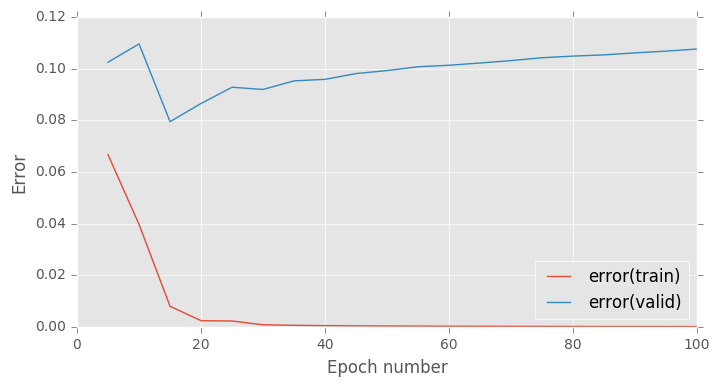

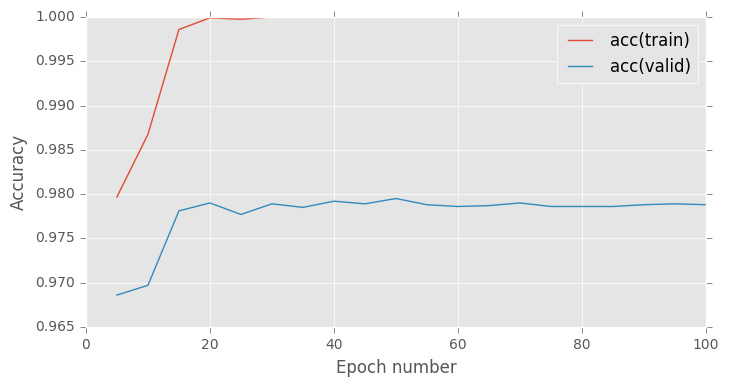

    final error(train) = 1.41e-04
    final error(valid) = 1.08e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.79e-01
    run time per epoch = 1.07s


In [18]:
batch_size = 50  # number of data points in a batch
init_scale = 0.1  # scale for random parameter initialisation
num_epochs = 100 # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats

learning_rates = [1e-2, 0.05, 0.1, 0.5, 1.]  # initial learning rate for gradient descent

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_train = []
final_accs_valid = []

for learning_rate in learning_rates:
    
    print('-' * 80)
    print('learning_rate={0:.3f} '
          .format(learning_rate))
    print('-' * 80)
    
    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    # Alter data-provider batch size
    train_data.batch_size = batch_size 
    valid_data.batch_size = batch_size

    input_dim, output_dim, hidden_dim = 784, 10, 100

    #Create a parameter initiliser 
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()

    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval)

    fig1_name = 'error_with_const_LR_{:1}.pdf'.format(learning_rate)
    print fig1_name
    fig2_name = 'acc_with_const_LR_{:1}.pdf'.format(learning_rate)
    fig_1.savefig(fig1_name)
    fig_2.savefig(fig2_name)
    print fig1_name
    plt.show()
    print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
    print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
    print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
    print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
    print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])

In [ ]:
j = 0
print('| learning_rate | final error(train) | final error(valid) | final acc(train) | final acc(valid) |')
print('|------------|--------------------|--------------------|------------------|------------------|')
for learning_rate in learning_rates:
    print('| {0:.2f}        | {1:.2e}           | {2:.2e}           |  {3:.4f}            | {4:.4f}           |'
          .format(learning_rate, 
                  final_errors_train[j], final_errors_valid[j],
                  final_accs_train[j], final_accs_valid[j]))
    j += 1

*Answer:* First, for the model using time-dependent linear rate, the performance of the validation data is better than that of training data with the initial learning rate of 0.1 and the free parameter of 10. However, the performance of the validation data is worser for the model using constant learning rate. 
Second, the overall performance of the time-dependent learning rate set is not as good as that of the constant learning rate. 

*Indicate how the free schedule parameters η0 and r affect the evolution of the training.*

## Part 2: Momentum learning rule

In [5]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider

# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)

# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = MNISTDataProvider('train', batch_size=50, rng=rng)
valid_data = MNISTDataProvider('valid', batch_size=50, rng=rng)

In [6]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit

input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()

*First Task >> Compare the performance of a basic gradient descent learning rule to the momentum learning rule for several values of the momentum coeﬃcient α.*

#### basic gradient descent learning rule

In [7]:
from mlp.learning_rules import GradientDescentLearningRule
from mlp.schedulers import ConstantLearningRateScheduler
from mlp.optimisers import Optimiser
from mlp.learning_rules import MomentumLearningRule
from mlp.schedulers import TimeDependentLearningRateScheduler
from mlp.schedulers import MomentumCoefficientScheduler

%matplotlib inline
plt.style.use('ggplot')

In [8]:
def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval):

    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Error')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    ax_2.set_ylabel('Accuracy')   
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

Epoch 5: 1.04s to complete
    error(train)=2.53e-01, acc(train)=9.27e-01, error(valid)=2.39e-01, acc(valid)=9.31e-01
Epoch 10: 0.95s to complete
    error(train)=1.75e-01, acc(train)=9.49e-01, error(valid)=1.72e-01, acc(valid)=9.51e-01
Epoch 15: 0.92s to complete
    error(train)=1.25e-01, acc(train)=9.64e-01, error(valid)=1.34e-01, acc(valid)=9.63e-01
Epoch 20: 0.92s to complete
    error(train)=9.84e-02, acc(train)=9.72e-01, error(valid)=1.18e-01, acc(valid)=9.67e-01
Epoch 25: 0.96s to complete
    error(train)=7.70e-02, acc(train)=9.79e-01, error(valid)=1.04e-01, acc(valid)=9.71e-01
Epoch 30: 0.93s to complete
    error(train)=6.23e-02, acc(train)=9.83e-01, error(valid)=9.83e-02, acc(valid)=9.71e-01
Epoch 35: 0.91s to complete
    error(train)=5.14e-02, acc(train)=9.87e-01, error(valid)=9.23e-02, acc(valid)=9.72e-01
Epoch 40: 0.92s to complete
    error(train)=4.26e-02, acc(train)=9.89e-01, error(valid)=8.85e-02, acc(valid)=9.74e-01
Epoch 45: 0.92s to complete
    error(train)=3.61

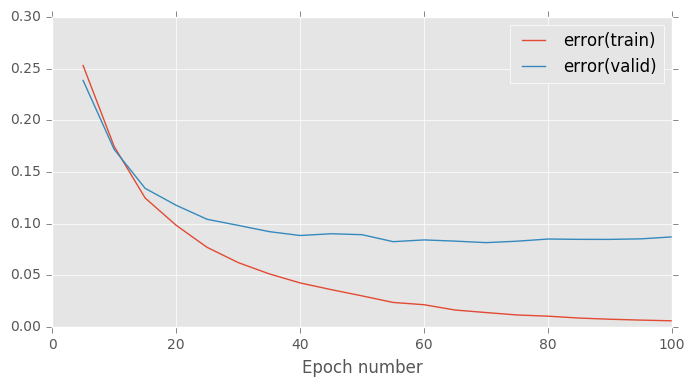

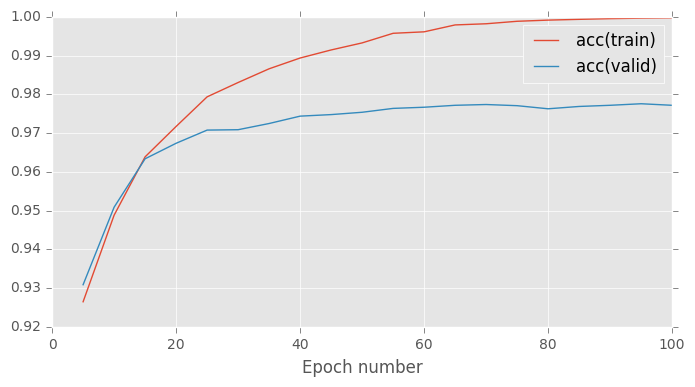

In [76]:
batch_size = 50  # number of data points in a batch
init_scale = 0.1  # scale for random parameter initialisation
learning_rate = 0.1  # initial learning rate for gradient descent
num_epochs = 100 # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

input_dim, output_dim, hidden_dim = 784, 10, 100

#Create a parameter initiliser 
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()

learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval)

#### momentum learning rule = 0.1

Epoch 5: 1.17s to complete
    error(train)=2.40e-01, acc(train)=9.31e-01, error(valid)=2.28e-01, acc(valid)=9.34e-01
Epoch 10: 1.14s to complete
    error(train)=1.59e-01, acc(train)=9.55e-01, error(valid)=1.60e-01, acc(valid)=9.56e-01
Epoch 15: 1.10s to complete
    error(train)=1.15e-01, acc(train)=9.67e-01, error(valid)=1.29e-01, acc(valid)=9.65e-01
Epoch 20: 1.15s to complete
    error(train)=8.90e-02, acc(train)=9.75e-01, error(valid)=1.13e-01, acc(valid)=9.68e-01
Epoch 25: 1.25s to complete
    error(train)=6.93e-02, acc(train)=9.81e-01, error(valid)=1.00e-01, acc(valid)=9.72e-01
Epoch 30: 1.13s to complete
    error(train)=5.60e-02, acc(train)=9.85e-01, error(valid)=9.43e-02, acc(valid)=9.72e-01
Epoch 35: 1.13s to complete
    error(train)=4.61e-02, acc(train)=9.88e-01, error(valid)=9.35e-02, acc(valid)=9.74e-01
Epoch 40: 1.12s to complete
    error(train)=3.59e-02, acc(train)=9.92e-01, error(valid)=8.65e-02, acc(valid)=9.76e-01
Epoch 45: 1.15s to complete
    error(train)=2.86

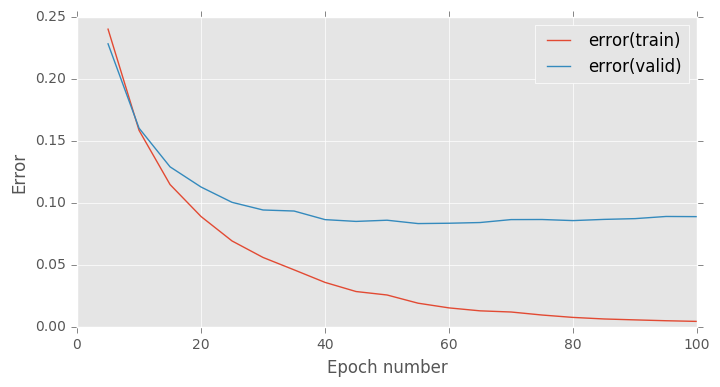

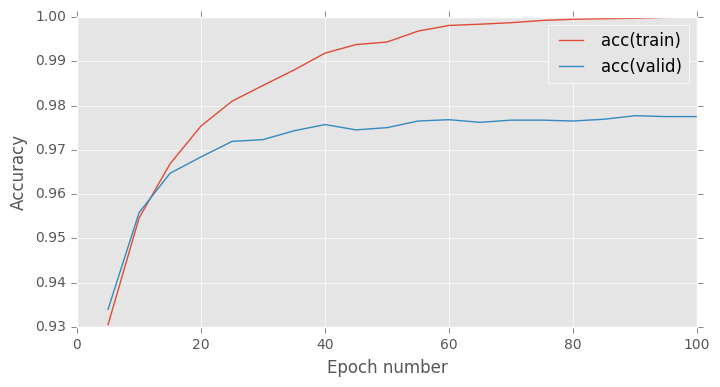

In [9]:
from mlp.learning_rules import MomentumLearningRule

batch_size = 50  # number of data points in a batch
init_scale = 0.1  # scale for random parameter initialisation
learning_rate = 0.1  # initial learning rate for gradient descent
num_epochs = 100 # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats

mom_coeff = 0.1 # momentum coefficient for the momentum learning rule

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

input_dim, output_dim, hidden_dim = 784, 10, 100

#Create a parameter initiliser 
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()

learning_rule = MomentumLearningRule(learning_rate=learning_rate,mom_coeff = mom_coeff)

_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval)



#### momentum learning rule = 0.5

Epoch 5: 1.33s to complete
    error(train)=1.74e-01, acc(train)=9.49e-01, error(valid)=1.73e-01, acc(valid)=9.51e-01
Epoch 10: 1.14s to complete
    error(train)=1.00e-01, acc(train)=9.72e-01, error(valid)=1.19e-01, acc(valid)=9.67e-01
Epoch 15: 1.32s to complete
    error(train)=6.67e-02, acc(train)=9.81e-01, error(valid)=1.00e-01, acc(valid)=9.71e-01
Epoch 20: 1.11s to complete
    error(train)=4.75e-02, acc(train)=9.87e-01, error(valid)=9.38e-02, acc(valid)=9.73e-01
Epoch 25: 1.17s to complete
    error(train)=3.24e-02, acc(train)=9.93e-01, error(valid)=8.47e-02, acc(valid)=9.76e-01
Epoch 30: 1.03s to complete
    error(train)=2.41e-02, acc(train)=9.95e-01, error(valid)=8.56e-02, acc(valid)=9.75e-01
Epoch 35: 1.04s to complete
    error(train)=1.69e-02, acc(train)=9.97e-01, error(valid)=8.71e-02, acc(valid)=9.76e-01
Epoch 40: 1.03s to complete
    error(train)=1.11e-02, acc(train)=9.99e-01, error(valid)=8.39e-02, acc(valid)=9.78e-01
Epoch 45: 1.03s to complete
    error(train)=8.34

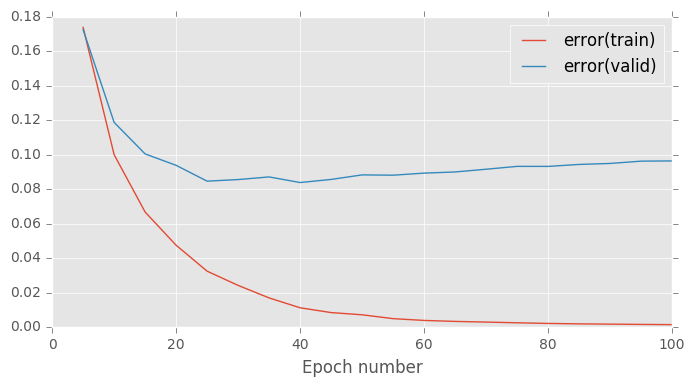

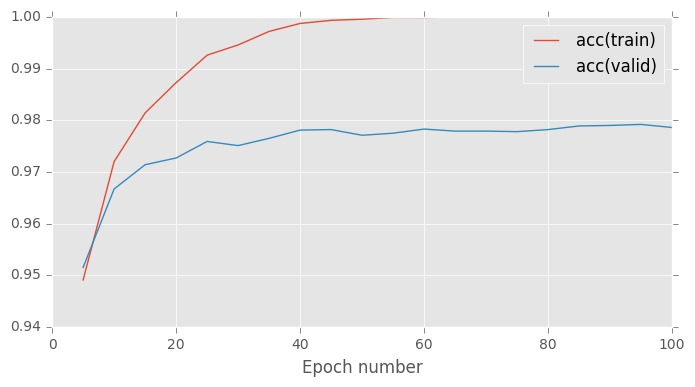

In [28]:
from mlp.learning_rules import MomentumLearningRule

batch_size = 50  # number of data points in a batch
init_scale = 0.1  # scale for random parameter initialisation
learning_rate = 0.1  # initial learning rate for gradient descent
num_epochs = 100 # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats

mom_coeff = 0.5 # momentum coefficient for the momentum learning rule

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

input_dim, output_dim, hidden_dim = 784, 10, 100

#Create a parameter initiliser 
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()

learning_rule = MomentumLearningRule(learning_rate=learning_rate,mom_coeff = mom_coeff)

_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval)


#### momentum learning rule = 0.7

Epoch 5: 1.26s to complete
    error(train)=1.25e-01, acc(train)=9.64e-01, error(valid)=1.35e-01, acc(valid)=9.62e-01
Epoch 10: 1.04s to complete
    error(train)=6.61e-02, acc(train)=9.82e-01, error(valid)=1.02e-01, acc(valid)=9.70e-01
Epoch 15: 1.03s to complete
    error(train)=3.84e-02, acc(train)=9.90e-01, error(valid)=8.86e-02, acc(valid)=9.74e-01
Epoch 20: 1.03s to complete
    error(train)=2.16e-02, acc(train)=9.95e-01, error(valid)=8.67e-02, acc(valid)=9.75e-01
Epoch 25: 1.03s to complete
    error(train)=1.28e-02, acc(train)=9.98e-01, error(valid)=8.39e-02, acc(valid)=9.77e-01
Epoch 30: 1.04s to complete
    error(train)=7.20e-03, acc(train)=1.00e+00, error(valid)=8.55e-02, acc(valid)=9.77e-01
Epoch 35: 1.03s to complete
    error(train)=4.95e-03, acc(train)=1.00e+00, error(valid)=8.98e-02, acc(valid)=9.77e-01
Epoch 40: 1.03s to complete
    error(train)=3.21e-03, acc(train)=1.00e+00, error(valid)=8.92e-02, acc(valid)=9.78e-01
Epoch 45: 1.03s to complete
    error(train)=2.52

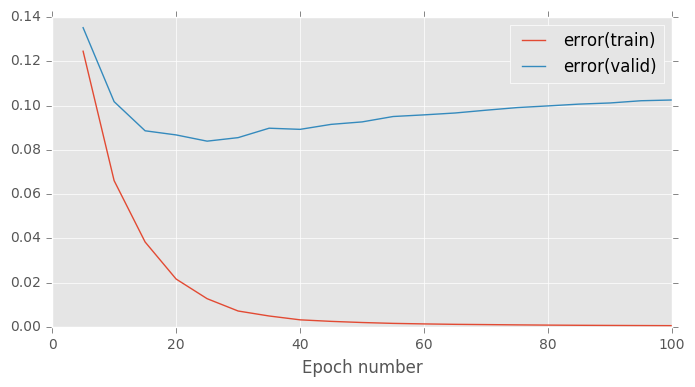

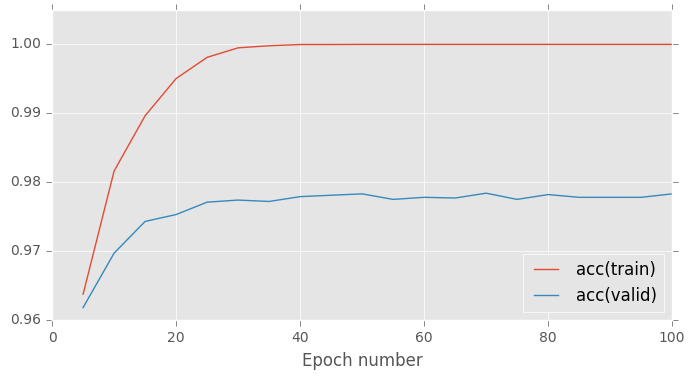

In [29]:

batch_size = 50  # number of data points in a batch
init_scale = 0.1  # scale for random parameter initialisation
learning_rate = 0.1  # initial learning rate for gradient descent
num_epochs = 100 # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats

mom_coeff = 0.7 # momentum coefficient for the momentum learning rule

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

input_dim, output_dim, hidden_dim = 784, 10, 100

#Create a parameter initiliser 
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()

learning_rule = MomentumLearningRule(learning_rate=learning_rate,mom_coeff = mom_coeff)

_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval)

#### momentum learning rule = 0.9

Epoch 5: 1.18s to complete
    error(train)=6.12e-02, acc(train)=9.81e-01, error(valid)=9.75e-02, acc(valid)=9.71e-01
Epoch 10: 1.27s to complete
    error(train)=2.82e-02, acc(train)=9.92e-01, error(valid)=9.68e-02, acc(valid)=9.72e-01
Epoch 15: 1.14s to complete
    error(train)=9.77e-03, acc(train)=9.98e-01, error(valid)=9.53e-02, acc(valid)=9.75e-01
Epoch 20: 1.38s to complete
    error(train)=1.94e-03, acc(train)=1.00e+00, error(valid)=9.29e-02, acc(valid)=9.77e-01
Epoch 25: 1.24s to complete
    error(train)=1.01e-03, acc(train)=1.00e+00, error(valid)=9.46e-02, acc(valid)=9.78e-01
Epoch 30: 1.19s to complete
    error(train)=7.09e-04, acc(train)=1.00e+00, error(valid)=9.78e-02, acc(valid)=9.78e-01
Epoch 35: 1.13s to complete
    error(train)=5.50e-04, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.78e-01
Epoch 40: 1.17s to complete
    error(train)=4.46e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.78e-01
Epoch 45: 1.16s to complete
    error(train)=3.82

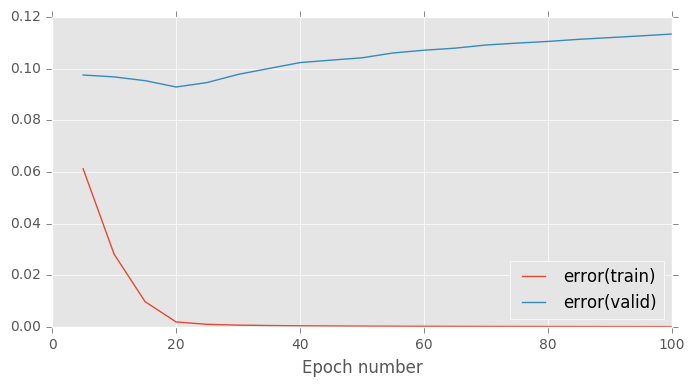

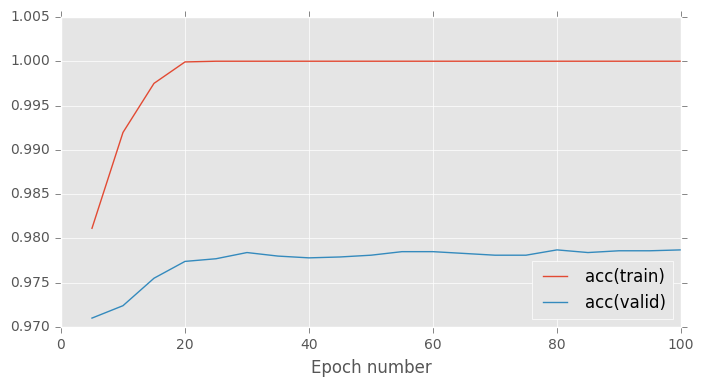

In [30]:

batch_size = 50  # number of data points in a batch
init_scale = 0.1  # scale for random parameter initialisation
learning_rate = 0.1  # initial learning rate for gradient descent
num_epochs = 100 # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats

mom_coeff = 0.9 # momentum coefficient for the momentum learning rule

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

input_dim, output_dim, hidden_dim = 784, 10, 100

#Create a parameter initiliser 
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()

learning_rule = MomentumLearningRule(learning_rate=learning_rate,mom_coeff = mom_coeff)

_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval)

In [10]:
# disable logging by setting handler to dummy object
logger.handlers = [logging.NullHandler()]

--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.10
--------------------------------------------------------------------------------
error_with_mom_0.1.pdf
error_with_mom_0.1.pdf


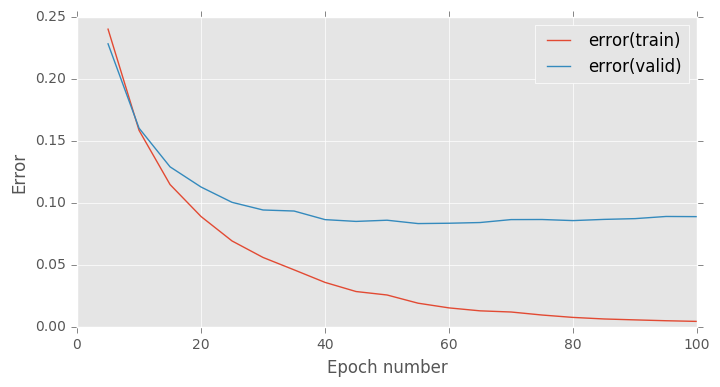

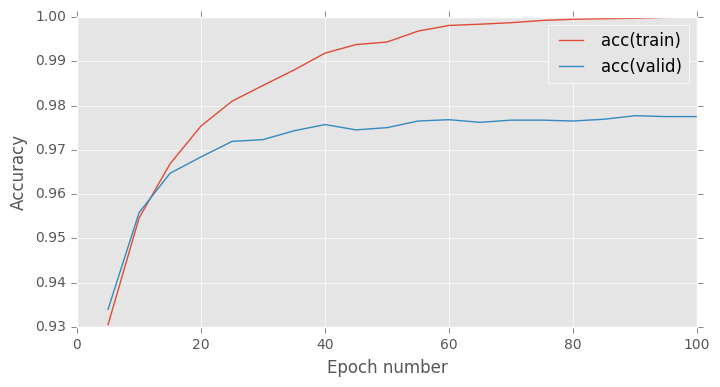

    final error(train) = 4.47e-03
    final error(valid) = 8.90e-02
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.77e-01
    run time per epoch = 1.31s
--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.30
--------------------------------------------------------------------------------
error_with_mom_0.3.pdf
error_with_mom_0.3.pdf


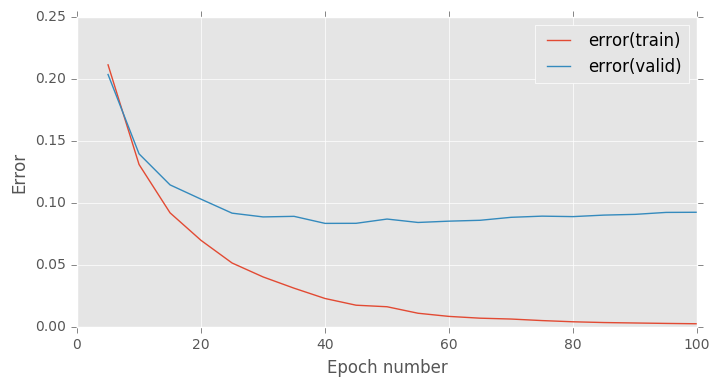

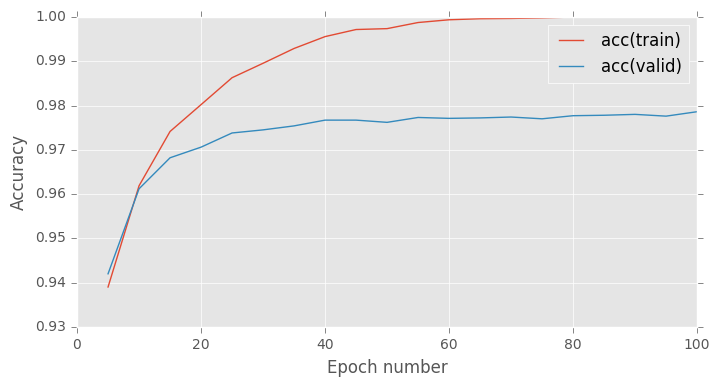

    final error(train) = 2.56e-03
    final error(valid) = 9.25e-02
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.79e-01
    run time per epoch = 1.29s
--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.50
--------------------------------------------------------------------------------
error_with_mom_0.5.pdf
error_with_mom_0.5.pdf


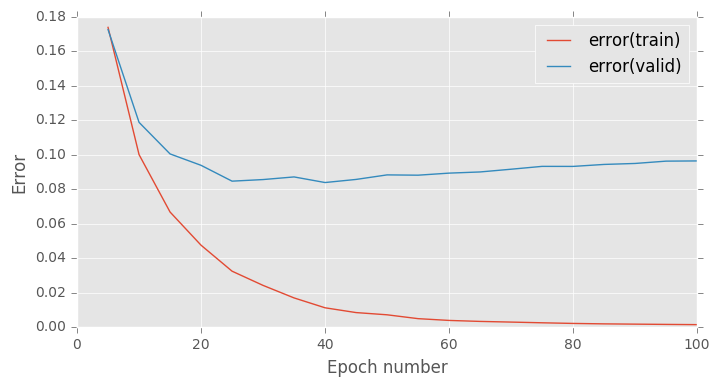

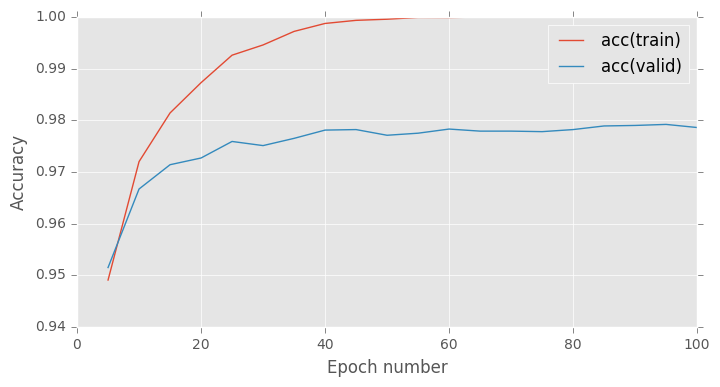

    final error(train) = 1.34e-03
    final error(valid) = 9.64e-02
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.79e-01
    run time per epoch = 1.31s
--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.90
--------------------------------------------------------------------------------
error_with_mom_0.9.pdf
error_with_mom_0.9.pdf


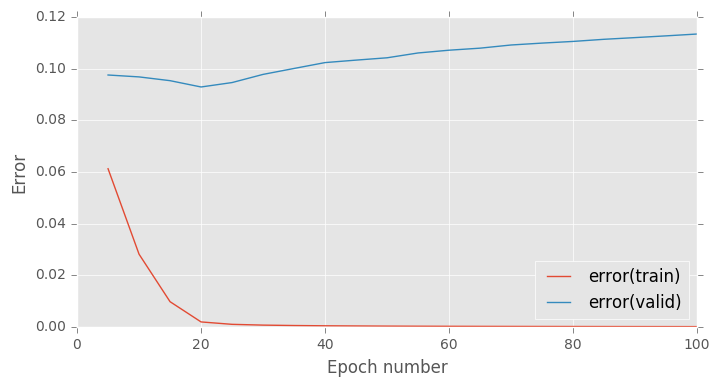

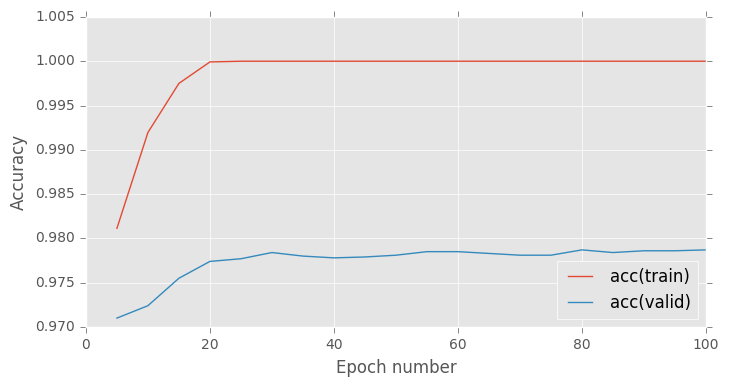

    final error(train) = 1.28e-04
    final error(valid) = 1.13e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.79e-01
    run time per epoch = 1.26s


In [11]:

batch_size = 50  # number of data points in a batch
init_scale = 0.1  # scale for random parameter initialisation
learning_rate = 0.1  # initial learning rate for gradient descent
num_epochs = 100 # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats

mom_coeffs = [0.1, 0.3, 0.5, 0.9] # momentum coefficient for the momentum learning rule
final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_train = []
final_accs_valid = []

for mom_coeff in mom_coeffs:
    
    print('-' * 80)
    print('learning_rate={0:.2f} mom_coeff={1:.2f}'
          .format(learning_rate, mom_coeff))
    print('-' * 80)
    
    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    # Alter data-provider batch size
    train_data.batch_size = batch_size 
    valid_data.batch_size = batch_size

    input_dim, output_dim, hidden_dim = 784, 10, 100

    #Create a parameter initiliser 
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()

    learning_rule = MomentumLearningRule(learning_rate=learning_rate,mom_coeff = mom_coeff)

    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval)
    fig1_name = 'error_with_mom_{:1}.pdf'.format(mom_coeff)
    print fig1_name
    fig2_name = 'acc_with_mom_{:1}.pdf'.format(mom_coeff)
    fig_1.savefig(fig1_name)
    fig_2.savefig(fig2_name)
    print fig1_name
    plt.show()
    
    print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
    print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
    print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
    print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
    print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])


In [12]:
j = 0
print final_accs_valid
print('| mom_coeffs | final error(train) | final error(valid) | final acc(train) | final acc(valid) |')
print('|------------|--------------------|--------------------|------------------|------------------|')
for mom_coeff in mom_coeffs:
    print('| {0:.1f}        | {1:.2e}           | {2:.2e}           |  {3:.2f}            | {4:.4f}           |'
          .format(mom_coeff, 
                  final_errors_train[j], final_errors_valid[j],
                  final_accs_train[j], final_accs_valid[j]))
    j += 1

[0.97749999999999904, 0.97859999999999903, 0.97859999999999914, 0.9786999999999989]
| mom_coeffs | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|------------|--------------------|--------------------|------------------|------------------|
| 0.1        | 4.47e-03           | 8.90e-02           |  1.00            | 0.9775           |
| 0.3        | 2.56e-03           | 9.25e-02           |  1.00            | 0.9786           |
| 0.5        | 1.34e-03           | 9.64e-02           |  1.00            | 0.9786           |
| 0.9        | 1.28e-04           | 1.13e-01           |  1.00            | 0.9787           |


In [13]:

def train_model_and_plot_stats_with_dynamic_mom_coeff(
        asy_mom_coeff, tau, gamma,
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval):

    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    schedulers = [MomentumCoefficientScheduler(asy_mom_coeff, tau, gamma)]
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, schedulers)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2



* Asy_mom_coeff

#### asy_mom_coeff = 0.3, tau = 100, gamma = 50

Epoch 5: 1.05s to complete
    error(train)=2.22e-01, acc(train)=9.36e-01, error(valid)=2.13e-01, acc(valid)=9.39e-01
Epoch 10: 1.07s to complete
    error(train)=1.37e-01, acc(train)=9.60e-01, error(valid)=1.44e-01, acc(valid)=9.60e-01
Epoch 15: 1.05s to complete
    error(train)=9.61e-02, acc(train)=9.73e-01, error(valid)=1.17e-01, acc(valid)=9.67e-01
Epoch 20: 1.05s to complete
    error(train)=7.27e-02, acc(train)=9.79e-01, error(valid)=1.05e-01, acc(valid)=9.70e-01
Epoch 25: 1.06s to complete
    error(train)=5.38e-02, acc(train)=9.86e-01, error(valid)=9.29e-02, acc(valid)=9.73e-01
Epoch 30: 1.06s to complete
    error(train)=4.22e-02, acc(train)=9.89e-01, error(valid)=8.97e-02, acc(valid)=9.74e-01
Epoch 35: 1.05s to complete
    error(train)=3.26e-02, acc(train)=9.92e-01, error(valid)=8.98e-02, acc(valid)=9.75e-01
Epoch 40: 1.06s to complete
    error(train)=2.40e-02, acc(train)=9.95e-01, error(valid)=8.39e-02, acc(valid)=9.76e-01
Epoch 45: 1.05s to complete
    error(train)=1.83

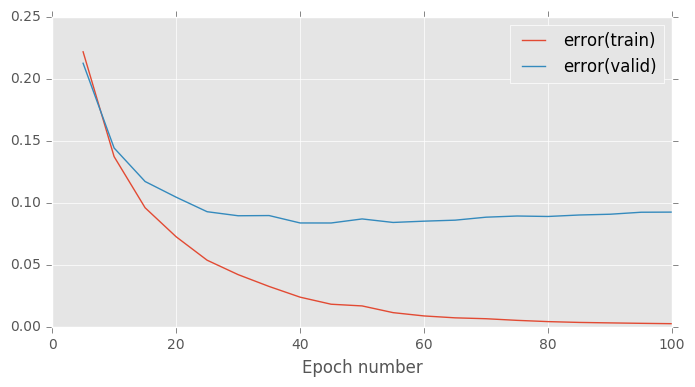

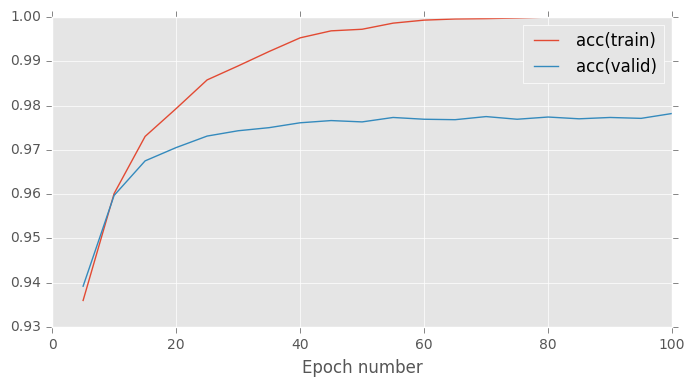

In [11]:

asy_mom_coeff = 0.3
tau = 100
gamma = 50

batch_size = 50  # number of data points in a batch
init_scale = 0.1  # scale for random parameter initialisation
learning_rate = 0.1  # initial learning rate for gradient descent
num_epochs = 100 # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats

mom_coeff = 0.9 # momentum coefficient for the momentum learning rule

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

input_dim, output_dim, hidden_dim = 784, 10, 100

#Create a parameter initiliser 
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()

learning_rule = MomentumLearningRule(learning_rate=learning_rate,mom_coeff = mom_coeff)

_ = train_model_and_plot_stats_with_dynamic_mom_coeff(
    asy_mom_coeff, tau, gamma,
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval)

In [14]:
# disable logging by setting handler to dummy object
logger.handlers = [logging.NullHandler()]

--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.90 asy_mom_coeff=0.10 tau=2.00 gamma1.00
--------------------------------------------------------------------------------
error_with_asy_mom_0.1.pdf
error_with_asy_mom_0.1.pdf


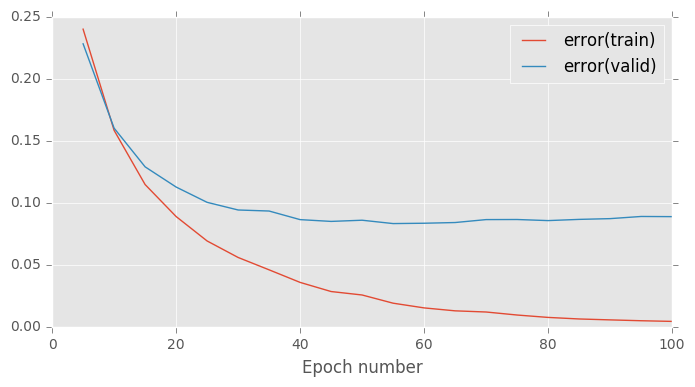

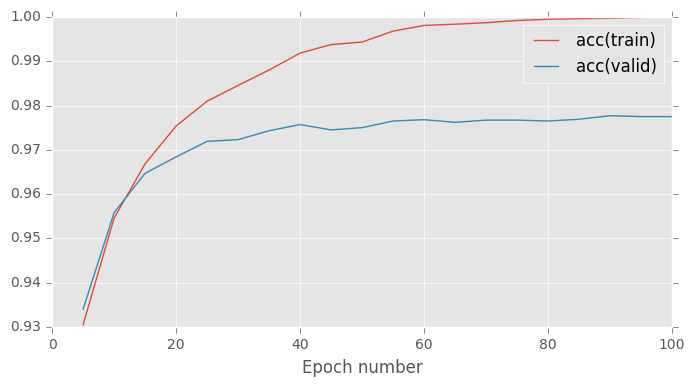

    final error(train) = 4.47e-03
    final error(valid) = 8.90e-02
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.77e-01
    run time per epoch = 1.32s
--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.90 asy_mom_coeff=0.30 tau=2.00 gamma1.00
--------------------------------------------------------------------------------
error_with_asy_mom_0.3.pdf
error_with_asy_mom_0.3.pdf


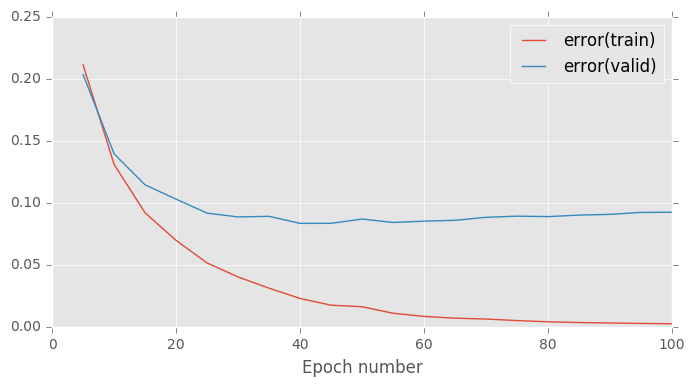

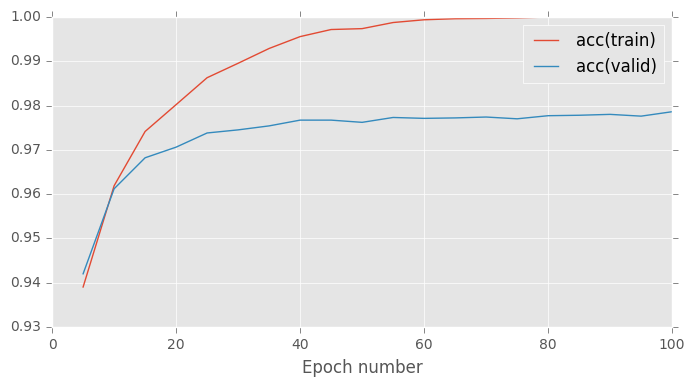

    final error(train) = 2.56e-03
    final error(valid) = 9.25e-02
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.79e-01
    run time per epoch = 1.32s
--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.90 asy_mom_coeff=0.50 tau=2.00 gamma1.00
--------------------------------------------------------------------------------
error_with_asy_mom_0.5.pdf
error_with_asy_mom_0.5.pdf


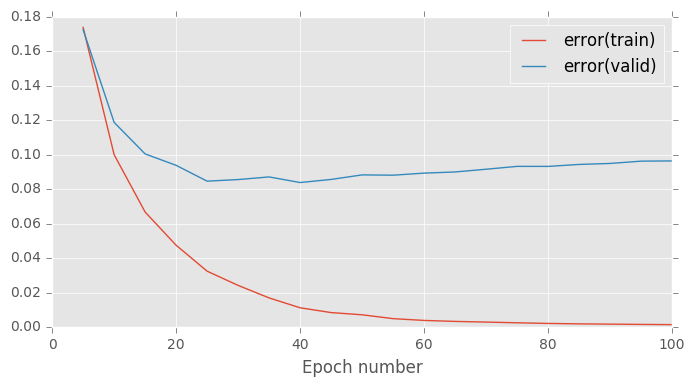

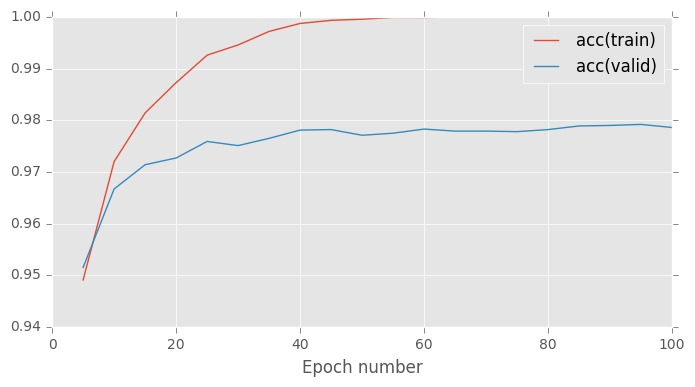

    final error(train) = 1.34e-03
    final error(valid) = 9.64e-02
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.79e-01
    run time per epoch = 1.29s
--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.90 asy_mom_coeff=0.70 tau=2.00 gamma1.00
--------------------------------------------------------------------------------
error_with_asy_mom_0.7.pdf
error_with_asy_mom_0.7.pdf


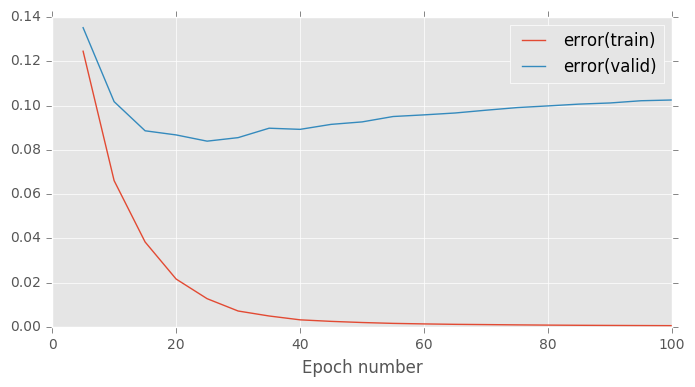

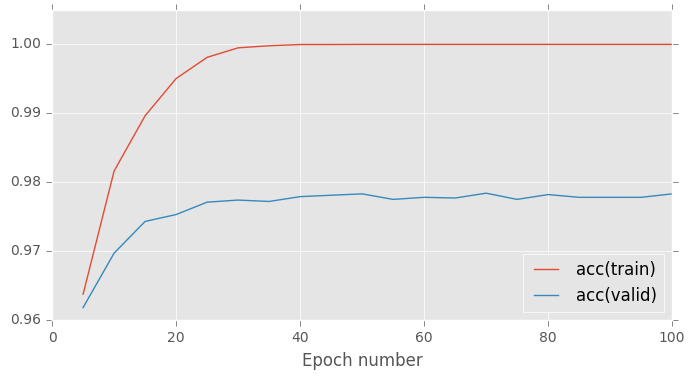

    final error(train) = 5.83e-04
    final error(valid) = 1.02e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.78e-01
    run time per epoch = 1.26s
--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.90 asy_mom_coeff=0.90 tau=2.00 gamma1.00
--------------------------------------------------------------------------------
error_with_asy_mom_0.9.pdf
error_with_asy_mom_0.9.pdf


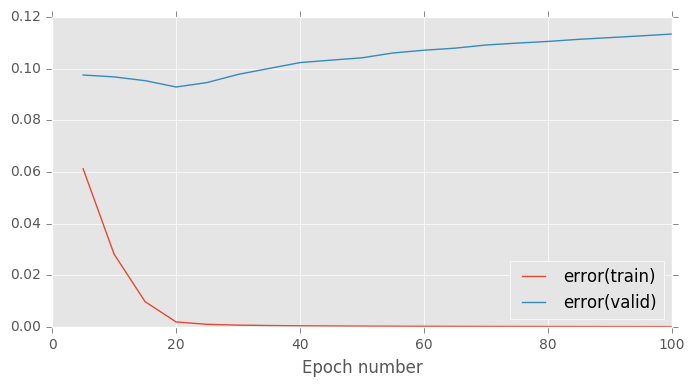

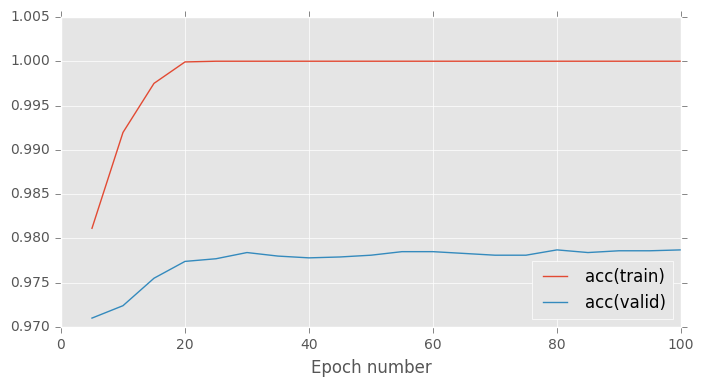

    final error(train) = 1.28e-04
    final error(valid) = 1.13e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.79e-01
    run time per epoch = 1.30s


In [15]:

batch_size = 50  # number of data points in a batch
init_scale = 0.1  # scale for random parameter initialisation
learning_rate = 0.1  # initial learning rate for gradient descent
num_epochs = 100 # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats

mom_coeffs = 0.9 # momentum coefficient for the momentum learning rule
asy_mom_coeffs = [0.1, 0.3, 0.5, 0.7,0.9] 
tau = 2
gamma = 1

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_train = []
final_accs_valid = []

for asy_mom_coeff in asy_mom_coeffs:
    
    print('-' * 80)
    print('learning_rate={0:.2f} mom_coeff={1:.2f} asy_mom_coeff={2:.2f} tau={3:.2f} gamma{4:.2f}'
          .format(learning_rate, mom_coeff, asy_mom_coeff, tau, gamma))
    print('-' * 80)
    
    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    # Alter data-provider batch size
    train_data.batch_size = batch_size 
    valid_data.batch_size = batch_size

    input_dim, output_dim, hidden_dim = 784, 10, 100

    #Create a parameter initiliser 
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()

    learning_rule = MomentumLearningRule(learning_rate=learning_rate,mom_coeff = mom_coeff)

    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats_with_dynamic_mom_coeff(
        asy_mom_coeff, tau, gamma,
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval)
    fig1_name = 'error_with_asy_mom_{:1}.pdf'.format(asy_mom_coeff)
    print fig1_name
    fig2_name = 'acc_with_asy_mom_{:1}.pdf'.format(asy_mom_coeff)
    fig_1.savefig(fig1_name)
    fig_2.savefig(fig2_name)
    print fig1_name
    plt.show()
    
    print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
    print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
    print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
    print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
    print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])



In [16]:
j = 0
print('|asy_mom_coeff| final error(train) | final error(valid) | final acc(train) | final acc(valid) |')
print('|-------------|--------------------|--------------------|------------------|------------------|')
for asy_mom_coeff in asy_mom_coeffs:
    print('| {0:.1f}         | {1:.2e}           | {2:.2e}           |  {3:.2f}            | {4:.4f}           |'
          .format(asy_mom_coeff, 
                  final_errors_train[j], final_errors_valid[j],
                  final_accs_train[j], final_accs_valid[j]))
    j += 1

|asy_mom_coeff| final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|-------------|--------------------|--------------------|------------------|------------------|
| 0.1         | 4.47e-03           | 8.90e-02           |  1.00            | 0.9775           |
| 0.3         | 2.56e-03           | 9.25e-02           |  1.00            | 0.9786           |
| 0.5         | 1.34e-03           | 9.64e-02           |  1.00            | 0.9786           |
| 0.7         | 5.83e-04           | 1.02e-01           |  1.00            | 0.9783           |
| 0.9         | 1.28e-04           | 1.13e-01           |  1.00            | 0.9787           |


* Taus

--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.90 asy_mom_coeff=0.90 tau=1.00 gamma=1.00
--------------------------------------------------------------------------------
error_with_tau_1.0.pdf
error_with_tau_1.0.pdf


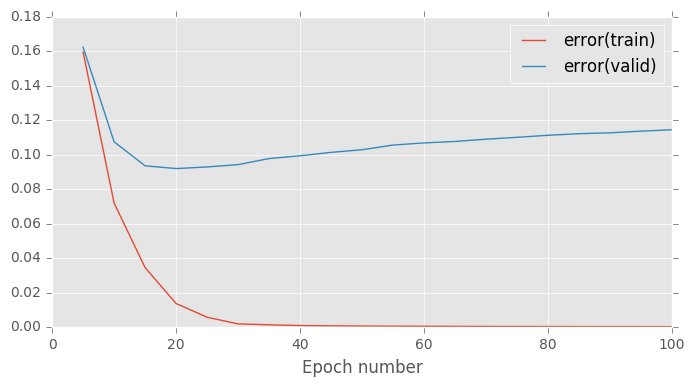

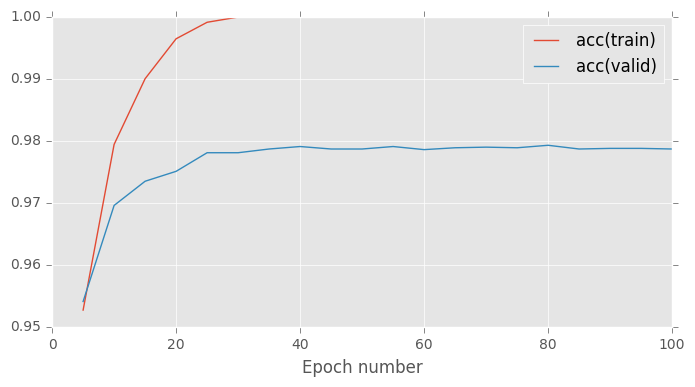

    final error(train) = 1.71e-04
    final error(valid) = 1.14e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.79e-01
    run time per epoch = 1.22s
--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.90 asy_mom_coeff=0.90 tau=1.50 gamma=1.00
--------------------------------------------------------------------------------
error_with_tau_1.5.pdf
error_with_tau_1.5.pdf


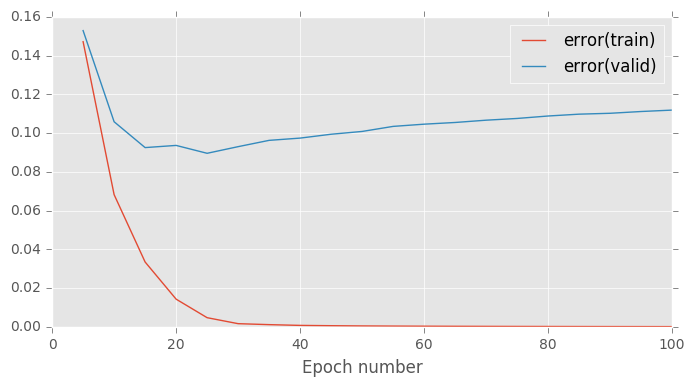

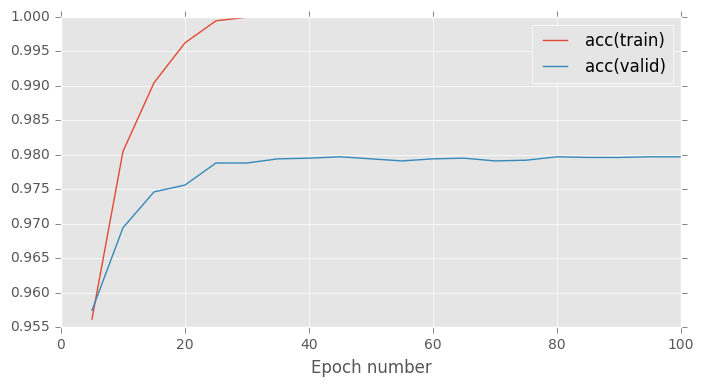

    final error(train) = 1.70e-04
    final error(valid) = 1.12e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.80e-01
    run time per epoch = 1.22s
--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.90 asy_mom_coeff=0.90 tau=2.00 gamma=1.00
--------------------------------------------------------------------------------
error_with_tau_2.0.pdf
error_with_tau_2.0.pdf


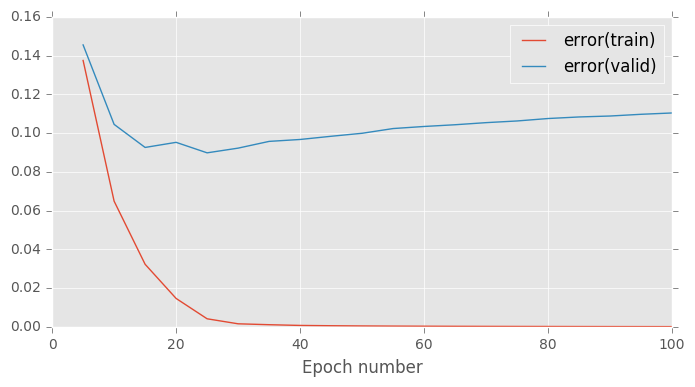

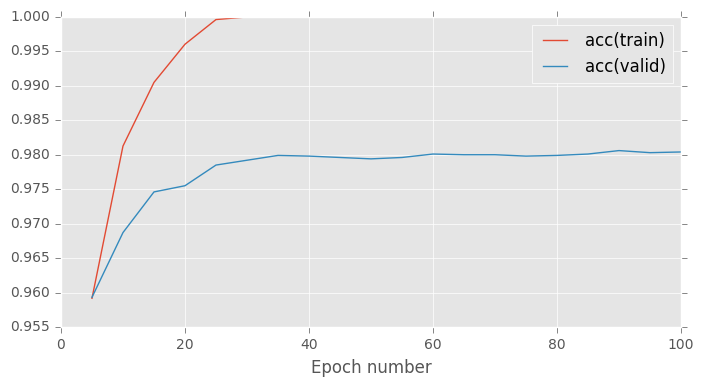

    final error(train) = 1.68e-04
    final error(valid) = 1.10e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.80e-01
    run time per epoch = 1.22s
--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.90 asy_mom_coeff=0.90 tau=5.00 gamma=1.00
--------------------------------------------------------------------------------
error_with_tau_5.0.pdf
error_with_tau_5.0.pdf


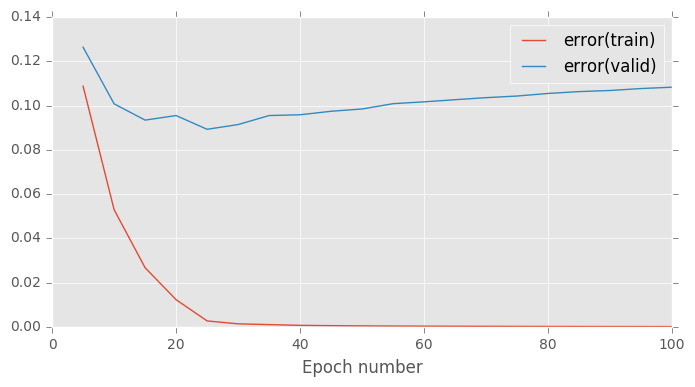

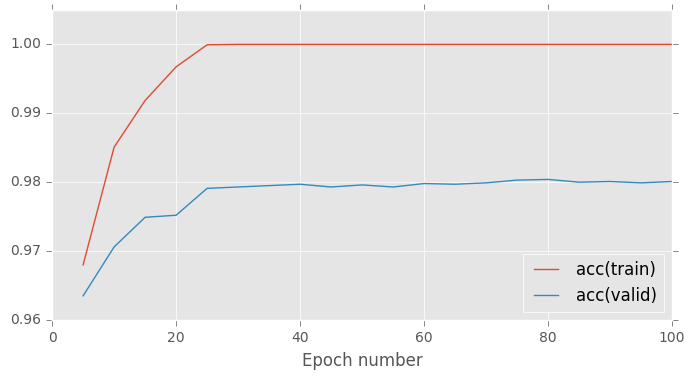

    final error(train) = 1.65e-04
    final error(valid) = 1.08e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.80e-01
    run time per epoch = 1.21s
--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.90 asy_mom_coeff=0.90 tau=10.00 gamma=1.00
--------------------------------------------------------------------------------
error_with_tau_10.0.pdf
error_with_tau_10.0.pdf


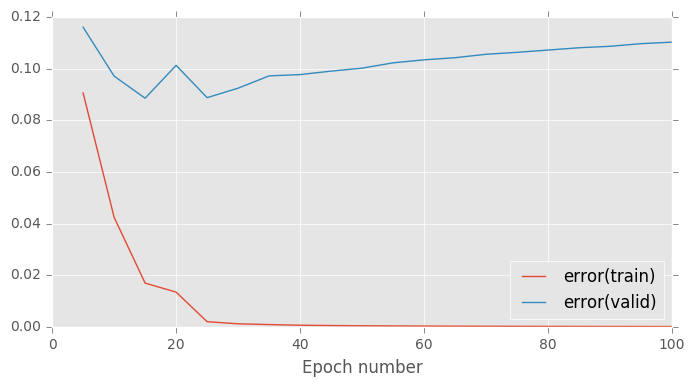

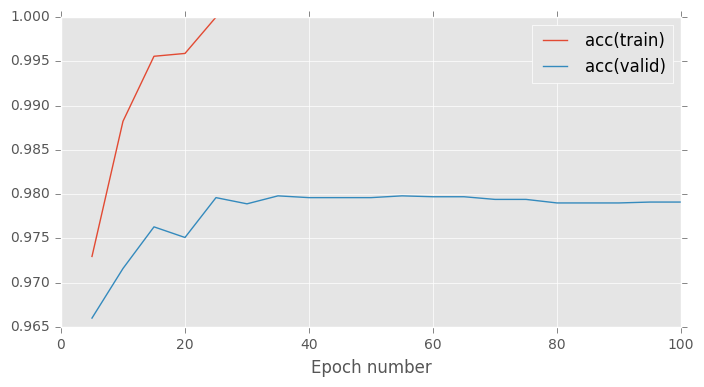

    final error(train) = 1.59e-04
    final error(valid) = 1.10e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.79e-01
    run time per epoch = 1.22s
--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.90 asy_mom_coeff=0.90 tau=100.00 gamma=1.00
--------------------------------------------------------------------------------
error_with_tau_100.0.pdf
error_with_tau_100.0.pdf


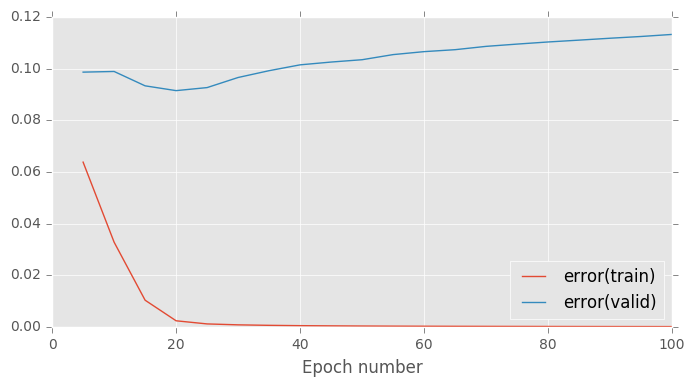

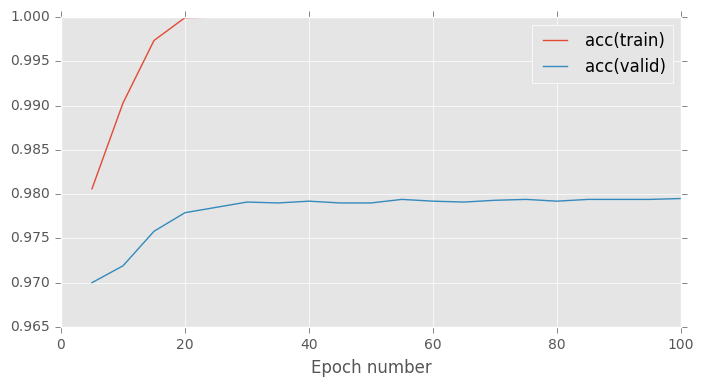

    final error(train) = 1.39e-04
    final error(valid) = 1.13e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.79e-01
    run time per epoch = 1.22s


In [29]:

batch_size = 50  # number of data points in a batch
init_scale = 0.1  # scale for random parameter initialisation
learning_rate = 0.1  # initial learning rate for gradient descent
num_epochs = 100 # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats

mom_coeffs = 0.9 # momentum coefficient for the momentum learning rule
asy_mom_coeff = 0.9
taus = [1., 1.5, 2., 5., 10., 100.]
gamma = 1

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_train = []
final_accs_valid = []

for tau in taus:
    print('-' * 80)
    print('learning_rate={0:.2f} mom_coeff={1:.2f} asy_mom_coeff={2:.2f} tau={3:.2f} gamma={4:.2f}'
          .format(learning_rate, mom_coeff, asy_mom_coeff, tau, gamma))
    print('-' * 80)
    
    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    # Alter data-provider batch size
    train_data.batch_size = batch_size 
    valid_data.batch_size = batch_size

    input_dim, output_dim, hidden_dim = 784, 10, 100

    #Create a parameter initiliser 
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()

    learning_rule = MomentumLearningRule(learning_rate=learning_rate,mom_coeff = mom_coeff)

    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats_with_dynamic_mom_coeff(
        asy_mom_coeff, tau, gamma,
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval)
    fig1_name = 'error_with_tau_{:1}.pdf'.format(tau)
    print fig1_name
    fig2_name = 'acc_with_tau_{:1}.pdf'.format(tau)
    fig_1.savefig(fig1_name)
    fig_2.savefig(fig2_name)
    print fig1_name
    plt.show()
    
    print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
    print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
    print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
    print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
    print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])


In [30]:
j = 0
print('|      tau    | final error(train) | final error(valid) | final acc(train) | final acc(valid) |')
print('|-------------|--------------------|--------------------|------------------|------------------|')
for tau in taus:
    print('| {0:.1f}         | {1:.2e}           | {2:.2e}           |  {3:.2f}            | {4:.4f}           |'
          .format(tau, 
                  final_errors_train[j], final_errors_valid[j],
                  final_accs_train[j], final_accs_valid[j]))
    j += 1

|      tau    | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|-------------|--------------------|--------------------|------------------|------------------|
| 1.0         | 1.71e-04           | 1.14e-01           |  1.00            | 0.9787           |
| 1.5         | 1.70e-04           | 1.12e-01           |  1.00            | 0.9797           |
| 2.0         | 1.68e-04           | 1.10e-01           |  1.00            | 0.9804           |
| 5.0         | 1.65e-04           | 1.08e-01           |  1.00            | 0.9801           |
| 10.0         | 1.59e-04           | 1.10e-01           |  1.00            | 0.9791           |
| 100.0         | 1.39e-04           | 1.13e-01           |  1.00            | 0.9795           |


* Gammas

--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.90 asy_mom_coeff=0.90 tau=1.00 gamma=0.20
--------------------------------------------------------------------------------


Epoch 5: 1.07s to complete
    error(train)=9.70e-02, acc(train)=9.71e-01, error(valid)=1.23e-01, acc(valid)=9.65e-01
Epoch 10: 1.06s to complete
    error(train)=3.68e-02, acc(train)=9.89e-01, error(valid)=9.26e-02, acc(valid)=9.73e-01
Epoch 15: 1.18s to complete
    error(train)=1.97e-02, acc(train)=9.94e-01, error(valid)=9.55e-02, acc(valid)=9.75e-01
Epoch 20: 1.07s to complete
    error(train)=4.98e-03, acc(train)=9.99e-01, error(valid)=9.57e-02, acc(valid)=9.77e-01
Epoch 25: 1.06s to complete
    error(train)=1.47e-03, acc(train)=1.00e+00, error(valid)=9.67e-02, acc(valid)=9.78e-01
Epoch 30: 1.06s to complete
    error(train)=8.57e-04, acc(train)=1.00e+00, error(valid)=9.85e-02, acc(valid)=9.78e-01
Epoch 35: 1.06s to complete
    error(train)=6.70e-04, acc(train)=1.00e+00, error(valid)=9.98e-02, acc(valid)=9.78e-01
Epoch 40: 1.17s to complete
    error(train)=5.07e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.77e-01
Epoch 45: 1.06s to complete
    error(train)=4.19

error_with_gamma_0.2.pdf
error_with_gamma_0.2.pdf


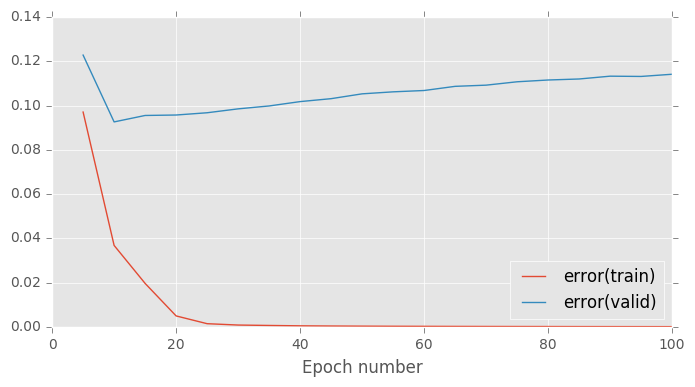

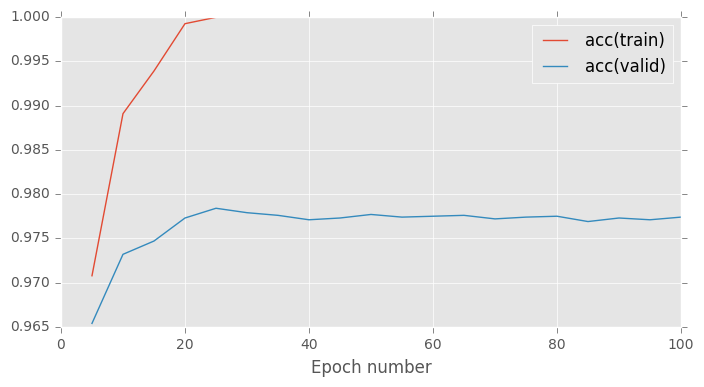

    final error(train) = 1.37e-04
    final error(valid) = 1.14e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.77e-01
    run time per epoch = 1.21s
--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.90 asy_mom_coeff=0.90 tau=1.00 gamma=0.50
--------------------------------------------------------------------------------


Epoch 5: 1.06s to complete
    error(train)=1.19e-01, acc(train)=9.65e-01, error(valid)=1.31e-01, acc(valid)=9.64e-01
Epoch 10: 1.07s to complete
    error(train)=5.78e-02, acc(train)=9.83e-01, error(valid)=1.01e-01, acc(valid)=9.70e-01
Epoch 15: 1.31s to complete
    error(train)=2.37e-02, acc(train)=9.92e-01, error(valid)=9.26e-02, acc(valid)=9.76e-01
Epoch 20: 1.09s to complete
    error(train)=7.60e-03, acc(train)=9.99e-01, error(valid)=9.39e-02, acc(valid)=9.77e-01
Epoch 25: 1.07s to complete
    error(train)=2.49e-03, acc(train)=1.00e+00, error(valid)=9.48e-02, acc(valid)=9.78e-01
Epoch 30: 1.08s to complete
    error(train)=1.20e-03, acc(train)=1.00e+00, error(valid)=9.73e-02, acc(valid)=9.78e-01
Epoch 35: 1.06s to complete
    error(train)=8.19e-04, acc(train)=1.00e+00, error(valid)=9.92e-02, acc(valid)=9.79e-01
Epoch 40: 1.07s to complete
    error(train)=6.14e-04, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.79e-01
Epoch 45: 1.07s to complete
    error(train)=5.06

error_with_gamma_0.5.pdf
error_with_gamma_0.5.pdf


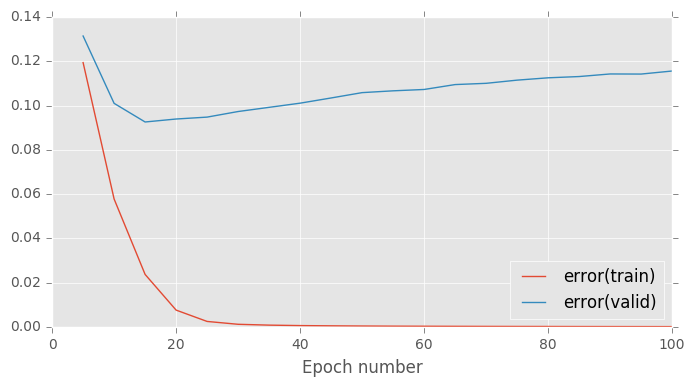

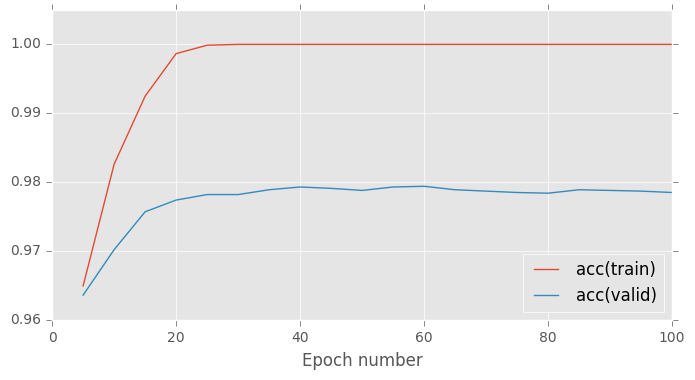

    final error(train) = 1.50e-04
    final error(valid) = 1.16e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.78e-01
    run time per epoch = 1.21s
--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.90 asy_mom_coeff=0.90 tau=1.00 gamma=0.70
--------------------------------------------------------------------------------


Epoch 5: 1.07s to complete
    error(train)=1.37e-01, acc(train)=9.60e-01, error(valid)=1.43e-01, acc(valid)=9.60e-01
Epoch 10: 1.06s to complete
    error(train)=6.52e-02, acc(train)=9.81e-01, error(valid)=1.03e-01, acc(valid)=9.70e-01
Epoch 15: 1.06s to complete
    error(train)=2.97e-02, acc(train)=9.90e-01, error(valid)=9.38e-02, acc(valid)=9.74e-01
Epoch 20: 1.06s to complete
    error(train)=1.23e-02, acc(train)=9.97e-01, error(valid)=9.45e-02, acc(valid)=9.77e-01
Epoch 25: 1.06s to complete
    error(train)=4.04e-03, acc(train)=1.00e+00, error(valid)=9.47e-02, acc(valid)=9.78e-01
Epoch 30: 1.07s to complete
    error(train)=1.45e-03, acc(train)=1.00e+00, error(valid)=9.47e-02, acc(valid)=9.79e-01
Epoch 35: 1.20s to complete
    error(train)=9.42e-04, acc(train)=1.00e+00, error(valid)=9.68e-02, acc(valid)=9.79e-01
Epoch 40: 1.06s to complete
    error(train)=6.94e-04, acc(train)=1.00e+00, error(valid)=9.86e-02, acc(valid)=9.79e-01
Epoch 45: 1.07s to complete
    error(train)=5.70

error_with_gamma_0.7.pdf
error_with_gamma_0.7.pdf


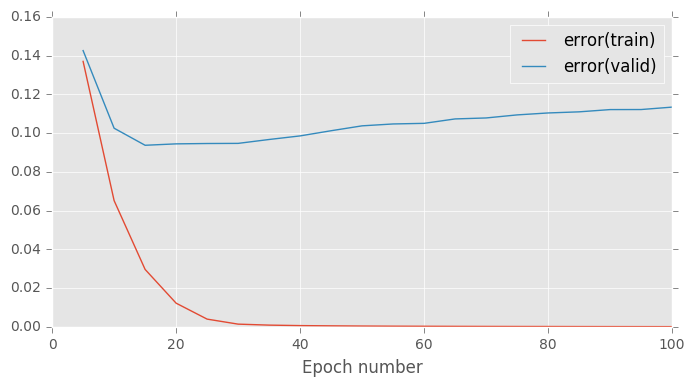

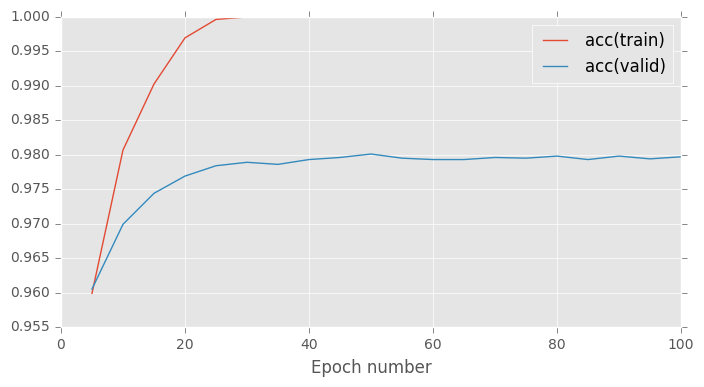

    final error(train) = 1.59e-04
    final error(valid) = 1.13e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.80e-01
    run time per epoch = 1.21s
--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.90 asy_mom_coeff=0.90 tau=1.00 gamma=0.90
--------------------------------------------------------------------------------


Epoch 5: 1.07s to complete
    error(train)=1.53e-01, acc(train)=9.55e-01, error(valid)=1.55e-01, acc(valid)=9.56e-01
Epoch 10: 1.07s to complete
    error(train)=7.04e-02, acc(train)=9.80e-01, error(valid)=1.04e-01, acc(valid)=9.69e-01
Epoch 15: 1.07s to complete
    error(train)=3.35e-02, acc(train)=9.89e-01, error(valid)=9.36e-02, acc(valid)=9.74e-01
Epoch 20: 1.07s to complete
    error(train)=1.25e-02, acc(train)=9.97e-01, error(valid)=8.74e-02, acc(valid)=9.77e-01
Epoch 25: 1.07s to complete
    error(train)=5.61e-03, acc(train)=9.99e-01, error(valid)=9.44e-02, acc(valid)=9.78e-01
Epoch 30: 1.08s to complete
    error(train)=1.76e-03, acc(train)=1.00e+00, error(valid)=9.38e-02, acc(valid)=9.79e-01
Epoch 35: 1.07s to complete
    error(train)=1.07e-03, acc(train)=1.00e+00, error(valid)=9.54e-02, acc(valid)=9.79e-01
Epoch 40: 1.07s to complete
    error(train)=7.78e-04, acc(train)=1.00e+00, error(valid)=9.73e-02, acc(valid)=9.79e-01
Epoch 45: 1.06s to complete
    error(train)=6.39

error_with_gamma_0.9.pdf
error_with_gamma_0.9.pdf


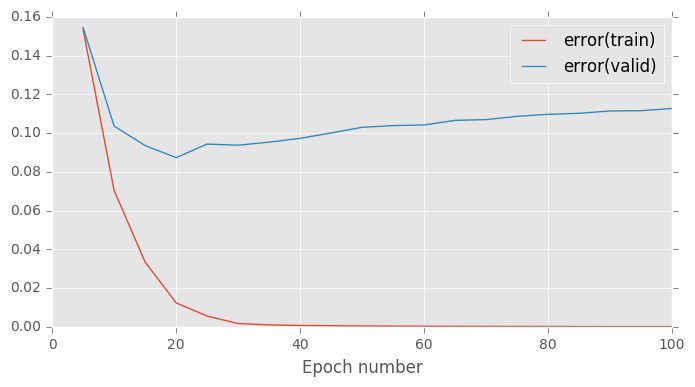

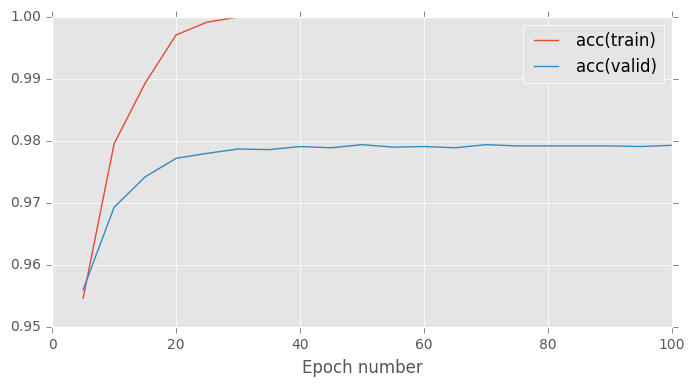

    final error(train) = 1.67e-04
    final error(valid) = 1.13e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.79e-01
    run time per epoch = 1.20s


In [57]:

batch_size = 50  # number of data points in a batch
init_scale = 0.1  # scale for random parameter initialisation
learning_rate = 0.1  # initial learning rate for gradient descent
num_epochs = 100 # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats

mom_coeffs = 0.9 # momentum coefficient for the momentum learning rule
asy_mom_coeff = 0.9
tau = 1
gammas = [0.2,0.5,0.7,0.9]

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_train = []
final_accs_valid = []

for gamma in gammas:
    
    print('-' * 80)
    print('learning_rate={0:.2f} mom_coeff={1:.2f} asy_mom_coeff={2:.2f} tau={3:.2f} gamma={4:.2f}'
          .format(learning_rate, mom_coeff, asy_mom_coeff, tau, gamma))
    print('-' * 80)
    
    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    # Alter data-provider batch size
    train_data.batch_size = batch_size 
    valid_data.batch_size = batch_size

    input_dim, output_dim, hidden_dim = 784, 10, 100

    #Create a parameter initiliser 
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()

    learning_rule = MomentumLearningRule(learning_rate=learning_rate,mom_coeff = mom_coeff)

    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats_with_dynamic_mom_coeff(
        asy_mom_coeff, tau, gamma,
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval)
    fig1_name = 'error_with_gamma_{:1}.pdf'.format(gamma)
    print fig1_name
    fig2_name = 'acc_with_gamma_{:1}.pdf'.format(gamma)
    fig_1.savefig(fig1_name)
    fig_2.savefig(fig2_name)
    print fig1_name
    plt.show()
    
    print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
    print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
    print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
    print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
    print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])





In [62]:
j = 0
print('| gamma  | final error(train) | final error(valid) | final acc(train) | final acc(valid) |')
print('|--------|--------------------|--------------------|------------------|------------------|')
for gamma in gammas:
    print('| {0:.1f}    | {1:.2e}           | {2:.2e}           |  {3:.2f}            | {4:.4f}           |'
          .format(gamma, 
                  final_errors_train[j], final_errors_valid[j],
                  final_accs_train[j], final_accs_valid[j]))
    j += 1

| gamma  | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|--------|--------------------|--------------------|------------------|------------------|
| 0.2    | 1.37e-04           | 1.14e-01           |  1.00            | 0.9774           |
| 0.5    | 1.50e-04           | 1.16e-01           |  1.00            | 0.9785           |
| 0.7    | 1.59e-04           | 1.13e-01           |  1.00            | 0.9797           |
| 0.9    | 1.67e-04           | 1.13e-01           |  1.00            | 0.9793           |


## Part 3: Adaptive learning rules

In [31]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider

# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)

# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = MNISTDataProvider('train', batch_size=50, rng=rng)
valid_data = MNISTDataProvider('valid', batch_size=50, rng=rng)

In [32]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit

input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()

In [33]:
import matplotlib.pyplot as plt
from mlp.learning_rules import AdagradLearningRule
from mlp.schedulers import ConstantLearningRateScheduler
from mlp.optimisers import Optimiser
from mlp.learning_rules import MomentumLearningRule
from mlp.schedulers import TimeDependentLearningRateScheduler
from mlp.schedulers import MomentumCoefficientScheduler
from mlp.learning_rules import AdagradLearningRule
from mlp.learning_rules import RMSpropLearningRule


%matplotlib inline
plt.style.use('ggplot')

In [34]:
def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval):

    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

* AdGrad

Epoch 5: 1.59s to complete
    error(train)=2.76e-02, acc(train)=9.93e-01, error(valid)=8.65e-02, acc(valid)=9.74e-01
Epoch 10: 1.60s to complete
    error(train)=1.00e-02, acc(train)=9.98e-01, error(valid)=8.97e-02, acc(valid)=9.76e-01
Epoch 15: 1.61s to complete
    error(train)=4.27e-03, acc(train)=1.00e+00, error(valid)=9.08e-02, acc(valid)=9.77e-01
Epoch 20: 1.60s to complete
    error(train)=2.27e-03, acc(train)=1.00e+00, error(valid)=9.58e-02, acc(valid)=9.77e-01
Epoch 25: 1.60s to complete
    error(train)=1.53e-03, acc(train)=1.00e+00, error(valid)=9.91e-02, acc(valid)=9.77e-01
Epoch 30: 1.60s to complete
    error(train)=1.11e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.78e-01
Epoch 35: 1.60s to complete
    error(train)=8.61e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.77e-01
Epoch 40: 1.60s to complete
    error(train)=6.90e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.78e-01
Epoch 45: 1.69s to complete
    error(train)=5.75

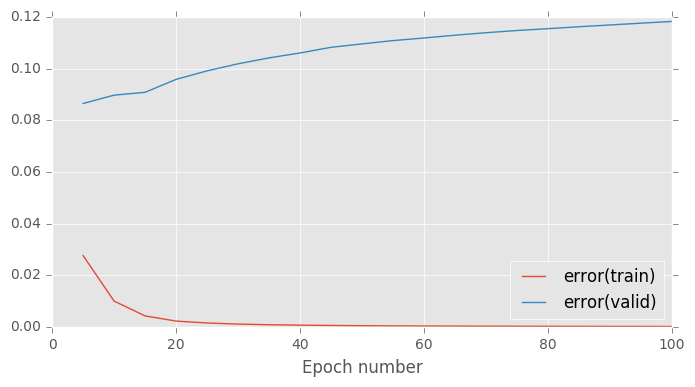

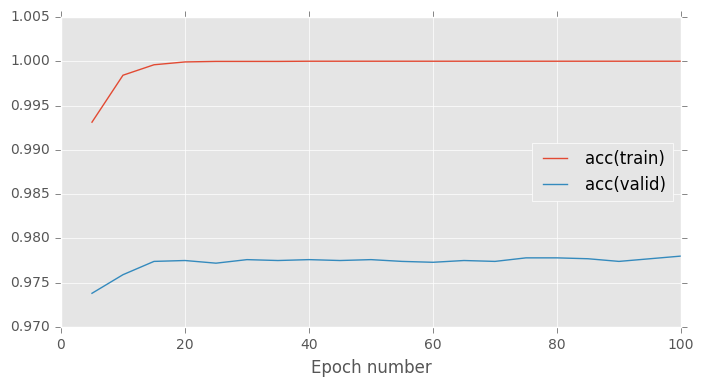

In [5]:
batch_size = 50  # number of data points in a batch
init_scale = 0.1  # scale for random parameter initialisation
learning_rate = 0.1  #  learning rate 
num_epochs = 100 # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

input_dim, output_dim, hidden_dim = 784, 10, 100

#Create a parameter initiliser 
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()

learning_rule = AdagradLearningRule(learning_rate=learning_rate)

_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval)

In [37]:
# disable logging by setting handler to dummy object
logger.handlers = [logging.NullHandler()]

--------------------------------------------------------------------------------
learning_rate=0.0010
--------------------------------------------------------------------------------


Epoch 5: 1.71s to complete
    error(train)=9.45e-01, acc(train)=7.96e-01, error(valid)=9.15e-01, acc(valid)=8.19e-01
Epoch 10: 1.72s to complete
    error(train)=7.08e-01, acc(train)=8.44e-01, error(valid)=6.75e-01, acc(valid)=8.64e-01
Epoch 15: 1.77s to complete
    error(train)=5.97e-01, acc(train)=8.64e-01, error(valid)=5.64e-01, acc(valid)=8.78e-01
Epoch 20: 1.63s to complete
    error(train)=5.30e-01, acc(train)=8.76e-01, error(valid)=4.98e-01, acc(valid)=8.89e-01
Epoch 25: 1.64s to complete
    error(train)=4.85e-01, acc(train)=8.84e-01, error(valid)=4.53e-01, acc(valid)=8.96e-01
Epoch 30: 1.63s to complete
    error(train)=4.52e-01, acc(train)=8.90e-01, error(valid)=4.21e-01, acc(valid)=9.01e-01
Epoch 35: 2.03s to complete
    error(train)=4.26e-01, acc(train)=8.94e-01, error(valid)=3.96e-01, acc(valid)=9.04e-01
Epoch 40: 1.63s to complete
    error(train)=4.06e-01, acc(train)=8.97e-01, error(valid)=3.77e-01, acc(valid)=9.07e-01
Epoch 45: 1.63s to complete
    error(train)=3.90

error_with_Adgrad_0.001.pdf
error_with_Adgrad_0.001.pdf


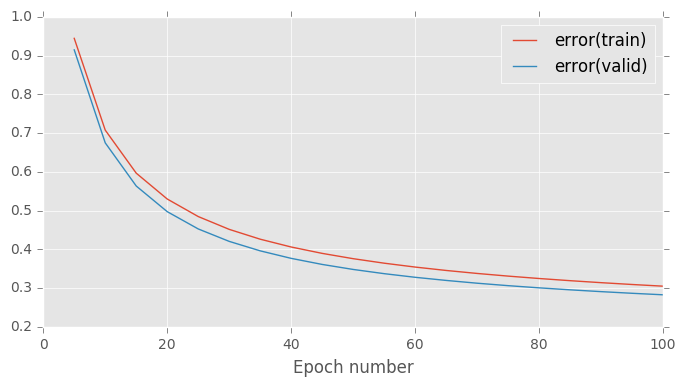

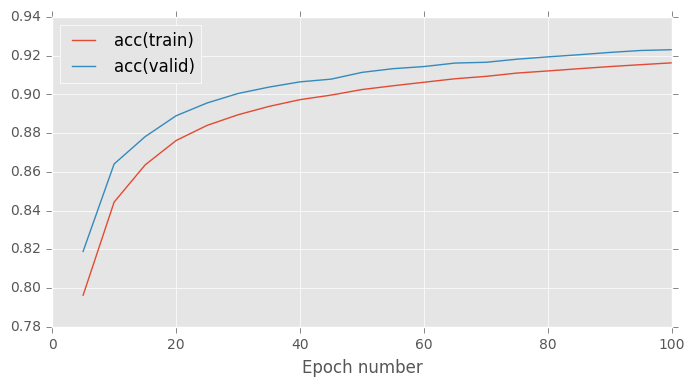

    final error(train) = 3.05e-01
    final error(valid) = 2.83e-01
    final acc(train)   = 9.16e-01
    final acc(valid)   = 9.23e-01
    run time per epoch = 1.80s
--------------------------------------------------------------------------------
learning_rate=0.0100
--------------------------------------------------------------------------------


Epoch 5: 1.68s to complete
    error(train)=2.06e-01, acc(train)=9.41e-01, error(valid)=1.98e-01, acc(valid)=9.45e-01
Epoch 10: 1.66s to complete
    error(train)=1.66e-01, acc(train)=9.52e-01, error(valid)=1.67e-01, acc(valid)=9.52e-01
Epoch 15: 1.63s to complete
    error(train)=1.43e-01, acc(train)=9.59e-01, error(valid)=1.49e-01, acc(valid)=9.57e-01
Epoch 20: 1.65s to complete
    error(train)=1.27e-01, acc(train)=9.64e-01, error(valid)=1.38e-01, acc(valid)=9.61e-01
Epoch 25: 1.65s to complete
    error(train)=1.16e-01, acc(train)=9.67e-01, error(valid)=1.30e-01, acc(valid)=9.62e-01
Epoch 30: 1.65s to complete
    error(train)=1.06e-01, acc(train)=9.70e-01, error(valid)=1.23e-01, acc(valid)=9.64e-01
Epoch 35: 1.66s to complete
    error(train)=9.88e-02, acc(train)=9.72e-01, error(valid)=1.19e-01, acc(valid)=9.66e-01
Epoch 40: 1.65s to complete
    error(train)=9.23e-02, acc(train)=9.74e-01, error(valid)=1.14e-01, acc(valid)=9.66e-01
Epoch 45: 1.64s to complete
    error(train)=8.66

error_with_Adgrad_0.01.pdf
error_with_Adgrad_0.01.pdf


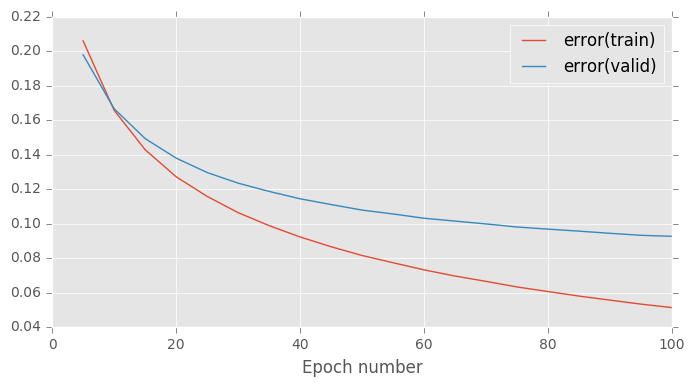

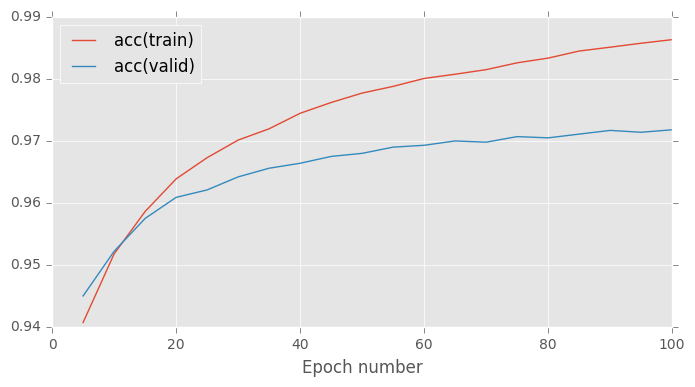

    final error(train) = 5.12e-02
    final error(valid) = 9.26e-02
    final acc(train)   = 9.86e-01
    final acc(valid)   = 9.72e-01
    run time per epoch = 1.97s
--------------------------------------------------------------------------------
learning_rate=0.0500
--------------------------------------------------------------------------------


Epoch 5: 1.73s to complete
    error(train)=5.15e-02, acc(train)=9.86e-01, error(valid)=8.92e-02, acc(valid)=9.73e-01
Epoch 10: 1.74s to complete
    error(train)=2.65e-02, acc(train)=9.94e-01, error(valid)=8.13e-02, acc(valid)=9.76e-01
Epoch 15: 1.76s to complete
    error(train)=1.50e-02, acc(train)=9.98e-01, error(valid)=7.88e-02, acc(valid)=9.78e-01
Epoch 20: 1.76s to complete
    error(train)=9.49e-03, acc(train)=9.99e-01, error(valid)=8.10e-02, acc(valid)=9.78e-01
Epoch 25: 1.69s to complete
    error(train)=6.45e-03, acc(train)=1.00e+00, error(valid)=8.19e-02, acc(valid)=9.78e-01
Epoch 30: 1.69s to complete
    error(train)=4.52e-03, acc(train)=1.00e+00, error(valid)=8.28e-02, acc(valid)=9.78e-01
Epoch 35: 2.40s to complete
    error(train)=3.43e-03, acc(train)=1.00e+00, error(valid)=8.49e-02, acc(valid)=9.79e-01
Epoch 40: 1.78s to complete
    error(train)=2.72e-03, acc(train)=1.00e+00, error(valid)=8.60e-02, acc(valid)=9.79e-01
Epoch 45: 1.76s to complete
    error(train)=2.26

error_with_Adgrad_0.05.pdf
error_with_Adgrad_0.05.pdf


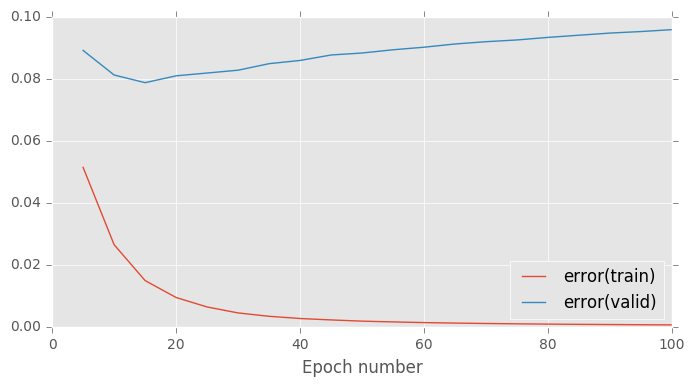

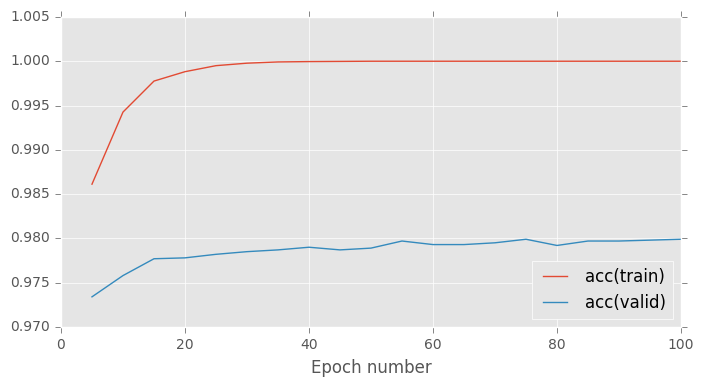

    final error(train) = 6.64e-04
    final error(valid) = 9.59e-02
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.80e-01
    run time per epoch = 1.98s
--------------------------------------------------------------------------------
learning_rate=0.1000
--------------------------------------------------------------------------------


Epoch 5: 1.96s to complete
    error(train)=2.76e-02, acc(train)=9.93e-01, error(valid)=8.65e-02, acc(valid)=9.74e-01
Epoch 10: 1.92s to complete
    error(train)=1.00e-02, acc(train)=9.98e-01, error(valid)=8.97e-02, acc(valid)=9.76e-01
Epoch 15: 1.94s to complete
    error(train)=4.27e-03, acc(train)=1.00e+00, error(valid)=9.08e-02, acc(valid)=9.77e-01
Epoch 20: 1.94s to complete
    error(train)=2.27e-03, acc(train)=1.00e+00, error(valid)=9.58e-02, acc(valid)=9.77e-01
Epoch 25: 1.94s to complete
    error(train)=1.53e-03, acc(train)=1.00e+00, error(valid)=9.91e-02, acc(valid)=9.77e-01
Epoch 30: 1.98s to complete
    error(train)=1.11e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.78e-01
Epoch 35: 1.91s to complete
    error(train)=8.61e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.77e-01
Epoch 40: 2.04s to complete
    error(train)=6.90e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.78e-01
Epoch 45: 1.86s to complete
    error(train)=5.75

error_with_Adgrad_0.1.pdf
error_with_Adgrad_0.1.pdf


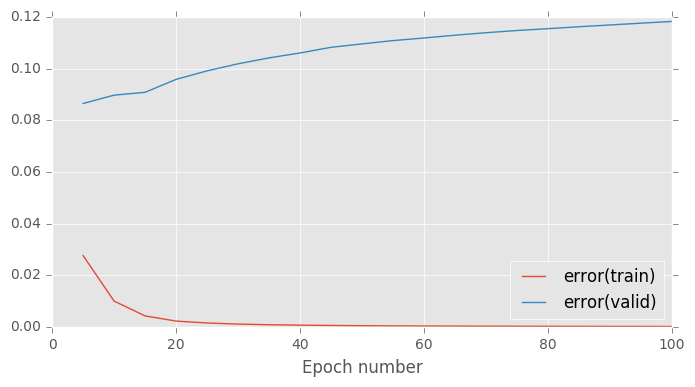

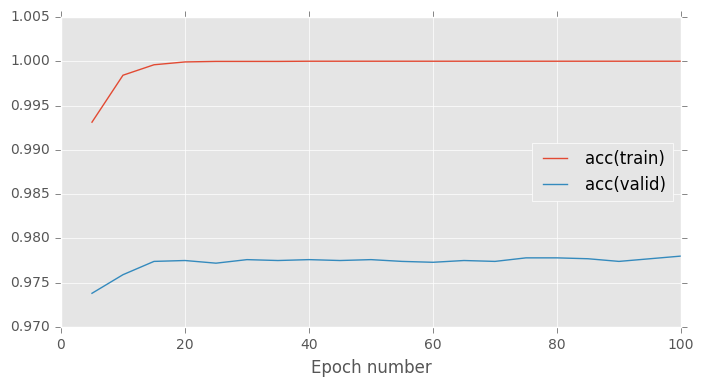

    final error(train) = 1.85e-04
    final error(valid) = 1.18e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.78e-01
    run time per epoch = 2.09s
--------------------------------------------------------------------------------
learning_rate=0.5000
--------------------------------------------------------------------------------


Epoch 5: 1.81s to complete
    error(train)=2.33e+00, acc(train)=9.68e-02, error(valid)=2.33e+00, acc(valid)=1.01e-01
Epoch 10: 1.76s to complete
    error(train)=2.32e+00, acc(train)=9.94e-02, error(valid)=2.32e+00, acc(valid)=9.90e-02
Epoch 15: 1.73s to complete
    error(train)=2.31e+00, acc(train)=9.98e-02, error(valid)=2.31e+00, acc(valid)=9.61e-02
Epoch 20: 1.94s to complete
    error(train)=2.31e+00, acc(train)=1.04e-01, error(valid)=2.31e+00, acc(valid)=1.09e-01
Epoch 25: 1.76s to complete
    error(train)=2.31e+00, acc(train)=1.14e-01, error(valid)=2.31e+00, acc(valid)=1.06e-01
Epoch 30: 1.78s to complete
    error(train)=2.31e+00, acc(train)=9.94e-02, error(valid)=2.31e+00, acc(valid)=9.90e-02
Epoch 35: 1.83s to complete
    error(train)=1.88e+00, acc(train)=2.00e-01, error(valid)=1.89e+00, acc(valid)=2.04e-01
Epoch 40: 1.69s to complete
    error(train)=1.57e+00, acc(train)=3.63e-01, error(valid)=1.56e+00, acc(valid)=3.69e-01
Epoch 45: 1.71s to complete
    error(train)=6.53

error_with_Adgrad_0.5.pdf
error_with_Adgrad_0.5.pdf


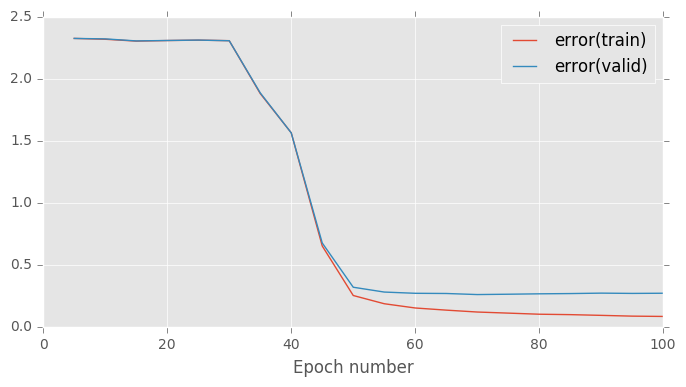

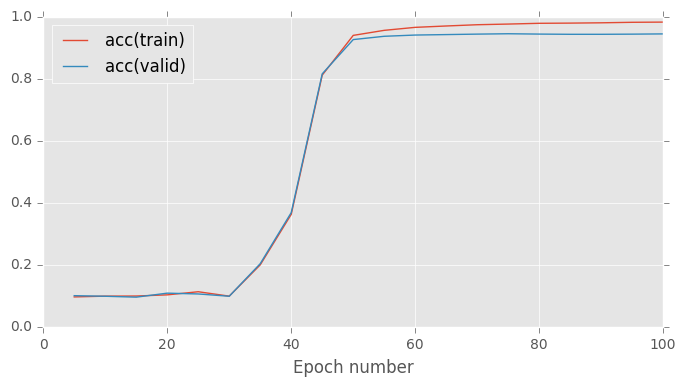

    final error(train) = 8.47e-02
    final error(valid) = 2.72e-01
    final acc(train)   = 9.83e-01
    final acc(valid)   = 9.45e-01
    run time per epoch = 1.94s


In [46]:

batch_size = 50  # number of data points in a batch
init_scale = 0.1  # scale for random parameter initialisation
learning_rates = [1e-03, 1e-02, 5e-02, 0.1,0.5]  # initial learning rate for gradient descent
num_epochs = 100 # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats


final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_train = []
final_accs_valid = []

for learning_rate in learning_rates:
    
    print('-' * 80)
    print('learning_rate={0:.4f}'
          .format(learning_rate))
    print('-' * 80)
    
    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    # Alter data-provider batch size
    train_data.batch_size = batch_size 
    valid_data.batch_size = batch_size

    input_dim, output_dim, hidden_dim = 784, 10, 100

    #Create a parameter initiliser 
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()

    learning_rule = AdagradLearningRule(learning_rate=learning_rate)

    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval)
    fig1_name = 'error_with_Adgrad_{:1}.pdf'.format(learning_rate)
    print fig1_name
    fig2_name = 'acc_with_Adgrad_{:1}.pdf'.format(learning_rate)
    fig_1.savefig(fig1_name)
    fig_2.savefig(fig2_name)
    print fig1_name
    plt.show()
    
    print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
    print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
    print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
    print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
    print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])

In [47]:
j = 0
print('| LR  | final error(train) | final error(valid) | final acc(train) | final acc(valid) |')
print('|--------|--------------------|--------------------|------------------|------------------|')
for learning_rate in learning_rates:
    print('| {0:.4f}    | {1:.2e}           | {2:.2e}           |  {3:.4f}            | {4:.4f}           |'
          .format(learning_rate, 
                  final_errors_train[j], final_errors_valid[j],
                  final_accs_train[j], final_accs_valid[j]))
    j += 1

| LR  | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|--------|--------------------|--------------------|------------------|------------------|
| 0.0010    | 3.05e-01           | 2.83e-01           |  0.9163            | 0.9231           |
| 0.0100    | 5.12e-02           | 9.26e-02           |  0.9863            | 0.9718           |
| 0.0500    | 6.64e-04           | 9.59e-02           |  1.0000            | 0.9799           |
| 0.1000    | 1.85e-04           | 1.18e-01           |  1.0000            | 0.9780           |
| 0.5000    | 8.47e-02           | 2.72e-01           |  0.9834            | 0.9453           |


* RMSprop

Epoch 5: 1.81s to complete
    error(train)=9.84e-02, acc(train)=9.72e-01, error(valid)=1.18e-01, acc(valid)=9.66e-01
Epoch 10: 1.96s to complete
    error(train)=5.26e-02, acc(train)=9.85e-01, error(valid)=1.00e-01, acc(valid)=9.72e-01
Epoch 15: 1.84s to complete
    error(train)=2.93e-02, acc(train)=9.92e-01, error(valid)=1.03e-01, acc(valid)=9.72e-01
Epoch 20: 1.76s to complete
    error(train)=1.53e-02, acc(train)=9.96e-01, error(valid)=1.05e-01, acc(valid)=9.75e-01
Epoch 25: 1.82s to complete
    error(train)=8.62e-03, acc(train)=9.98e-01, error(valid)=1.16e-01, acc(valid)=9.76e-01
Epoch 30: 2.07s to complete
    error(train)=4.60e-03, acc(train)=9.99e-01, error(valid)=1.24e-01, acc(valid)=9.76e-01
Epoch 35: 1.85s to complete
    error(train)=5.54e-03, acc(train)=9.98e-01, error(valid)=1.63e-01, acc(valid)=9.72e-01
Epoch 40: 1.85s to complete
    error(train)=2.44e-03, acc(train)=9.99e-01, error(valid)=1.69e-01, acc(valid)=9.74e-01
Epoch 45: 1.78s to complete
    error(train)=8.89

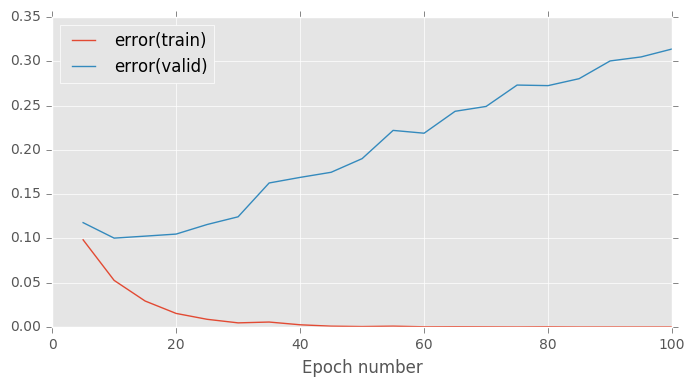

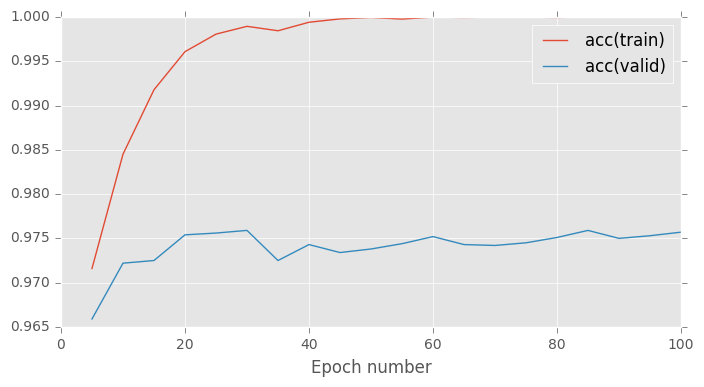

In [6]:
batch_size = 50  # number of data points in a batch
init_scale = 0.1  # scale for random parameter initialisation
learning_rate = 1e-3  # initial learning rate for gradient descent
num_epochs = 100 # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

input_dim, output_dim, hidden_dim = 784, 10, 100

#Create a parameter initiliser 
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()

learning_rule = RMSpropLearningRule(learning_rate=learning_rate)

_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval)

--------------------------------------------------------------------------------
learning_rate=0.0001
--------------------------------------------------------------------------------


Epoch 5: 1.85s to complete
    error(train)=3.46e-01, acc(train)=9.05e-01, error(valid)=3.19e-01, acc(valid)=9.13e-01
Epoch 10: 1.92s to complete
    error(train)=2.47e-01, acc(train)=9.28e-01, error(valid)=2.30e-01, acc(valid)=9.32e-01
Epoch 15: 1.79s to complete
    error(train)=2.03e-01, acc(train)=9.39e-01, error(valid)=1.94e-01, acc(valid)=9.45e-01
Epoch 20: 1.92s to complete
    error(train)=1.74e-01, acc(train)=9.48e-01, error(valid)=1.70e-01, acc(valid)=9.52e-01
Epoch 25: 1.84s to complete
    error(train)=1.52e-01, acc(train)=9.55e-01, error(valid)=1.53e-01, acc(valid)=9.57e-01
Epoch 30: 1.89s to complete
    error(train)=1.34e-01, acc(train)=9.60e-01, error(valid)=1.41e-01, acc(valid)=9.60e-01
Epoch 35: 1.83s to complete
    error(train)=1.20e-01, acc(train)=9.65e-01, error(valid)=1.31e-01, acc(valid)=9.63e-01
Epoch 40: 1.87s to complete
    error(train)=1.08e-01, acc(train)=9.68e-01, error(valid)=1.23e-01, acc(valid)=9.64e-01
Epoch 45: 1.87s to complete
    error(train)=9.76

error_with_RMSprop_0.0001.pdf
error_with_RMSprop_0.0001.pdf


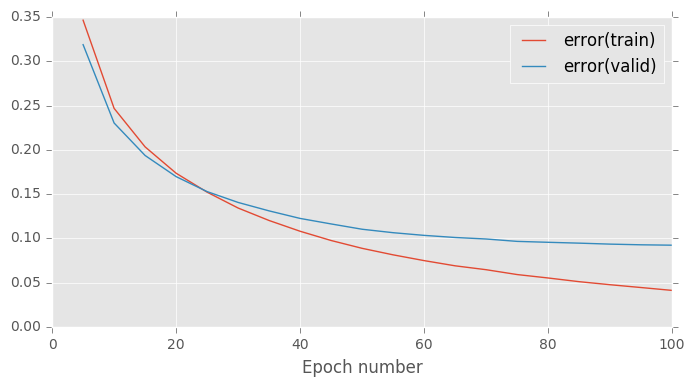

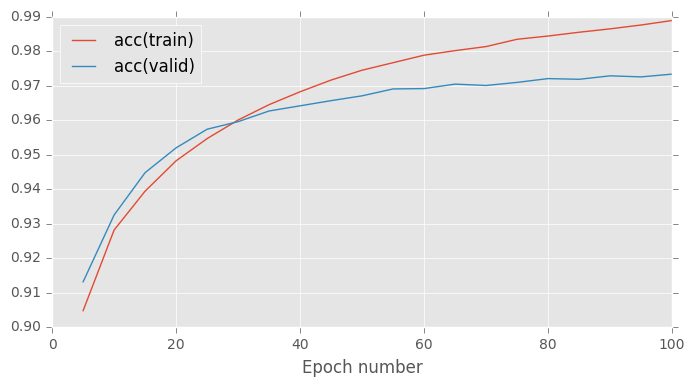

    final error(train) = 4.13e-02
    final error(valid) = 9.23e-02
    final acc(train)   = 9.89e-01
    final acc(valid)   = 9.73e-01
    run time per epoch = 1.99s
--------------------------------------------------------------------------------
learning_rate=0.0010
--------------------------------------------------------------------------------


Epoch 5: 1.76s to complete
    error(train)=9.84e-02, acc(train)=9.72e-01, error(valid)=1.18e-01, acc(valid)=9.66e-01
Epoch 10: 1.75s to complete
    error(train)=5.26e-02, acc(train)=9.85e-01, error(valid)=1.00e-01, acc(valid)=9.72e-01
Epoch 15: 1.75s to complete
    error(train)=2.93e-02, acc(train)=9.92e-01, error(valid)=1.03e-01, acc(valid)=9.72e-01
Epoch 20: 1.76s to complete
    error(train)=1.53e-02, acc(train)=9.96e-01, error(valid)=1.05e-01, acc(valid)=9.75e-01
Epoch 25: 1.82s to complete
    error(train)=8.62e-03, acc(train)=9.98e-01, error(valid)=1.16e-01, acc(valid)=9.76e-01
Epoch 30: 1.76s to complete
    error(train)=4.60e-03, acc(train)=9.99e-01, error(valid)=1.24e-01, acc(valid)=9.76e-01
Epoch 35: 1.76s to complete
    error(train)=5.54e-03, acc(train)=9.98e-01, error(valid)=1.63e-01, acc(valid)=9.72e-01
Epoch 40: 1.77s to complete
    error(train)=2.44e-03, acc(train)=9.99e-01, error(valid)=1.69e-01, acc(valid)=9.74e-01
Epoch 45: 1.76s to complete
    error(train)=8.89

error_with_RMSprop_0.001.pdf
error_with_RMSprop_0.001.pdf


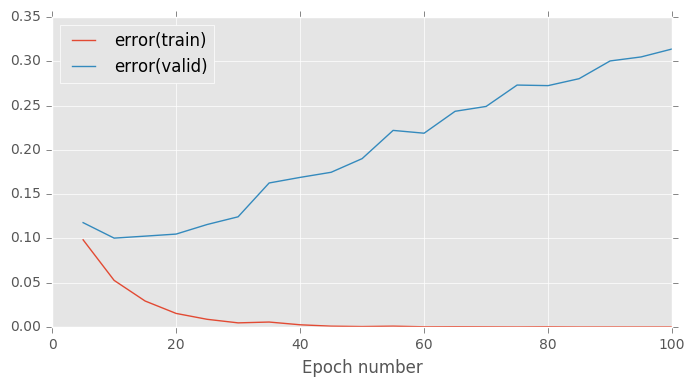

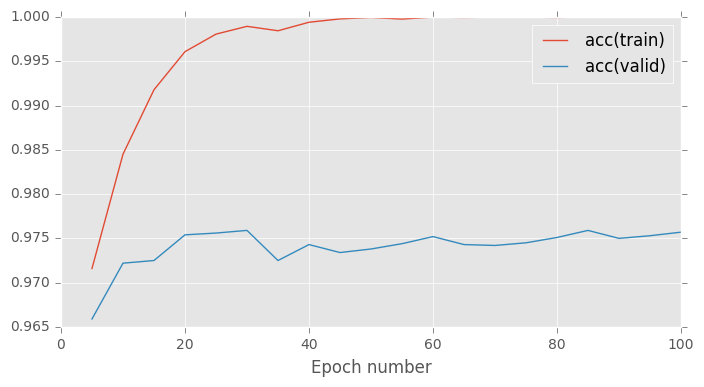

    final error(train) = 7.41e-08
    final error(valid) = 3.14e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.76e-01
    run time per epoch = 1.95s
--------------------------------------------------------------------------------
learning_rate=0.0050
--------------------------------------------------------------------------------


Epoch 5: 1.80s to complete
    error(train)=3.58e-02, acc(train)=9.89e-01, error(valid)=9.84e-02, acc(valid)=9.74e-01
Epoch 10: 1.80s to complete
    error(train)=1.71e-02, acc(train)=9.95e-01, error(valid)=1.29e-01, acc(valid)=9.76e-01
Epoch 15: 1.78s to complete
    error(train)=7.81e-03, acc(train)=9.97e-01, error(valid)=1.65e-01, acc(valid)=9.74e-01
Epoch 20: 1.82s to complete
    error(train)=4.42e-03, acc(train)=9.99e-01, error(valid)=1.98e-01, acc(valid)=9.75e-01
Epoch 25: 1.88s to complete
    error(train)=2.48e-03, acc(train)=9.99e-01, error(valid)=2.15e-01, acc(valid)=9.77e-01
Epoch 30: 2.06s to complete
    error(train)=3.06e-03, acc(train)=9.99e-01, error(valid)=2.62e-01, acc(valid)=9.75e-01
Epoch 35: 1.85s to complete
    error(train)=2.38e-03, acc(train)=9.99e-01, error(valid)=2.73e-01, acc(valid)=9.76e-01
Epoch 40: 2.00s to complete
    error(train)=1.82e-03, acc(train)=9.99e-01, error(valid)=2.84e-01, acc(valid)=9.76e-01
Epoch 45: 2.03s to complete
    error(train)=1.11

error_with_RMSprop_0.005.pdf
error_with_RMSprop_0.005.pdf


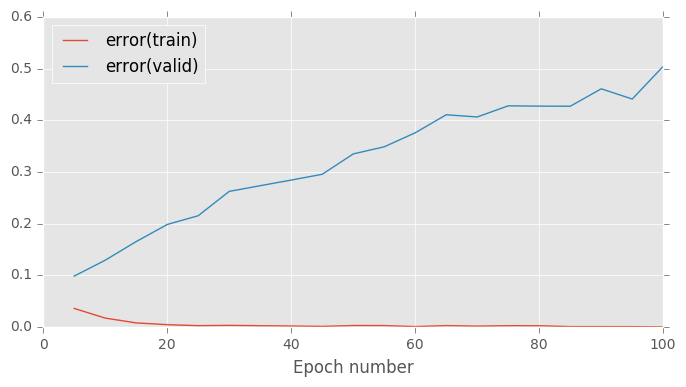

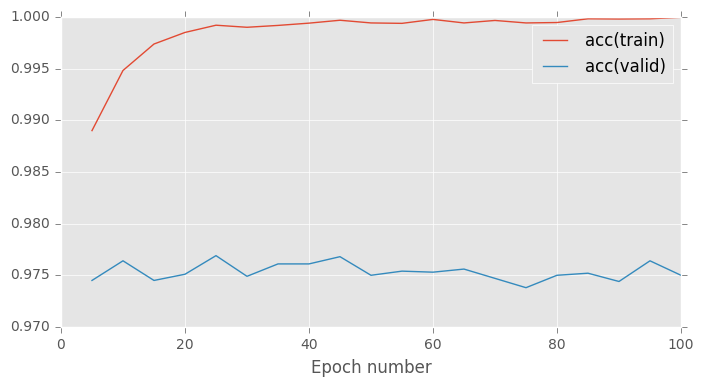

    final error(train) = 1.62e-04
    final error(valid) = 5.04e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.75e-01
    run time per epoch = 2.05s
--------------------------------------------------------------------------------
learning_rate=0.0100
--------------------------------------------------------------------------------


Epoch 5: 1.75s to complete
    error(train)=4.25e-02, acc(train)=9.87e-01, error(valid)=1.03e-01, acc(valid)=9.73e-01
Epoch 10: 1.80s to complete
    error(train)=2.45e-02, acc(train)=9.92e-01, error(valid)=1.45e-01, acc(valid)=9.74e-01
Epoch 15: 1.88s to complete
    error(train)=1.78e-02, acc(train)=9.95e-01, error(valid)=1.74e-01, acc(valid)=9.75e-01
Epoch 20: 1.84s to complete
    error(train)=1.14e-02, acc(train)=9.97e-01, error(valid)=1.98e-01, acc(valid)=9.76e-01
Epoch 25: 1.78s to complete
    error(train)=9.87e-03, acc(train)=9.97e-01, error(valid)=2.29e-01, acc(valid)=9.76e-01
Epoch 30: 1.80s to complete
    error(train)=1.03e-02, acc(train)=9.97e-01, error(valid)=2.54e-01, acc(valid)=9.73e-01
Epoch 35: 1.76s to complete
    error(train)=8.46e-03, acc(train)=9.98e-01, error(valid)=3.06e-01, acc(valid)=9.75e-01
Epoch 40: 1.79s to complete
    error(train)=7.86e-03, acc(train)=9.98e-01, error(valid)=3.60e-01, acc(valid)=9.74e-01
Epoch 45: 1.95s to complete
    error(train)=8.56

error_with_RMSprop_0.01.pdf
error_with_RMSprop_0.01.pdf


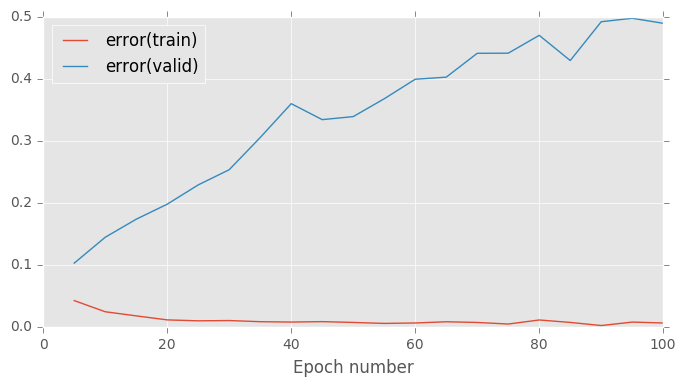

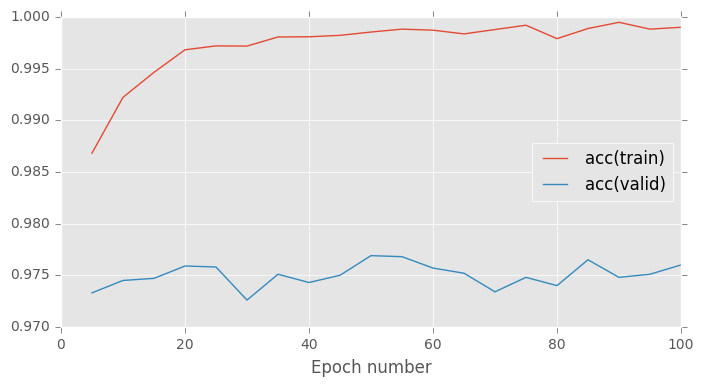

    final error(train) = 6.38e-03
    final error(valid) = 4.90e-01
    final acc(train)   = 9.99e-01
    final acc(valid)   = 9.76e-01
    run time per epoch = 1.96s
--------------------------------------------------------------------------------
learning_rate=0.0500
--------------------------------------------------------------------------------


Epoch 5: 2.02s to complete
    error(train)=2.90e-01, acc(train)=9.42e-01, error(valid)=3.34e-01, acc(valid)=9.40e-01
Epoch 10: 2.04s to complete
    error(train)=3.15e-01, acc(train)=9.48e-01, error(valid)=3.43e-01, acc(valid)=9.49e-01
Epoch 15: 1.87s to complete
    error(train)=2.91e-01, acc(train)=9.52e-01, error(valid)=3.20e-01, acc(valid)=9.49e-01
Epoch 20: 1.91s to complete
    error(train)=2.62e-01, acc(train)=9.50e-01, error(valid)=3.38e-01, acc(valid)=9.43e-01
Epoch 25: 2.04s to complete
    error(train)=2.14e-01, acc(train)=9.59e-01, error(valid)=2.99e-01, acc(valid)=9.55e-01
Epoch 30: 1.94s to complete
    error(train)=3.29e-01, acc(train)=9.51e-01, error(valid)=4.06e-01, acc(valid)=9.49e-01
Epoch 35: 1.95s to complete
    error(train)=2.89e-01, acc(train)=9.46e-01, error(valid)=3.58e-01, acc(valid)=9.47e-01
Epoch 40: 2.12s to complete
    error(train)=2.53e-01, acc(train)=9.58e-01, error(valid)=3.48e-01, acc(valid)=9.50e-01
Epoch 45: 2.47s to complete
    error(train)=1.93

error_with_RMSprop_0.05.pdf
error_with_RMSprop_0.05.pdf


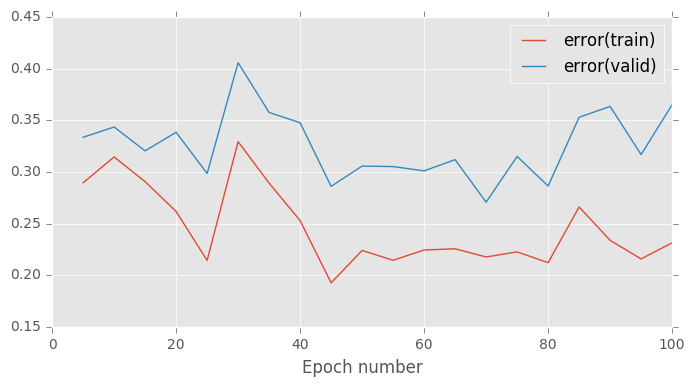

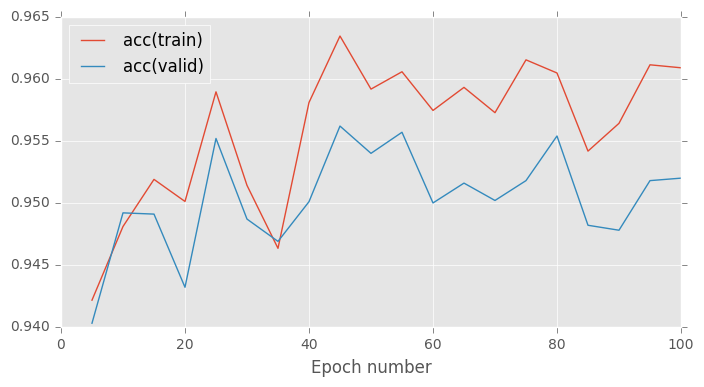

    final error(train) = 2.31e-01
    final error(valid) = 3.65e-01
    final acc(train)   = 9.61e-01
    final acc(valid)   = 9.52e-01
    run time per epoch = 2.28s
--------------------------------------------------------------------------------
learning_rate=0.1000
--------------------------------------------------------------------------------


Epoch 5: 1.81s to complete
    error(train)=5.33e-01, acc(train)=8.94e-01, error(valid)=5.04e-01, acc(valid)=9.02e-01
Epoch 10: 1.87s to complete
    error(train)=4.73e-01, acc(train)=9.10e-01, error(valid)=4.84e-01, acc(valid)=9.12e-01
Epoch 15: 1.97s to complete
    error(train)=3.62e-01, acc(train)=9.25e-01, error(valid)=3.97e-01, acc(valid)=9.23e-01
Epoch 20: 1.93s to complete
    error(train)=4.55e-01, acc(train)=9.20e-01, error(valid)=4.70e-01, acc(valid)=9.26e-01
Epoch 25: 2.12s to complete
    error(train)=3.90e-01, acc(train)=9.29e-01, error(valid)=4.34e-01, acc(valid)=9.34e-01
Epoch 30: 2.18s to complete
    error(train)=3.67e-01, acc(train)=9.30e-01, error(valid)=3.62e-01, acc(valid)=9.35e-01
Epoch 35: 2.04s to complete
    error(train)=5.17e-01, acc(train)=8.96e-01, error(valid)=5.51e-01, acc(valid)=9.01e-01
Epoch 40: 2.09s to complete
    error(train)=3.75e-01, acc(train)=9.28e-01, error(valid)=4.37e-01, acc(valid)=9.27e-01
Epoch 45: 2.27s to complete
    error(train)=3.60

error_with_RMSprop_0.1.pdf
error_with_RMSprop_0.1.pdf


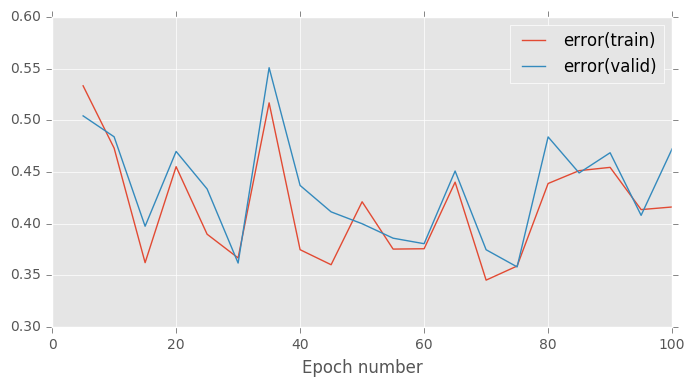

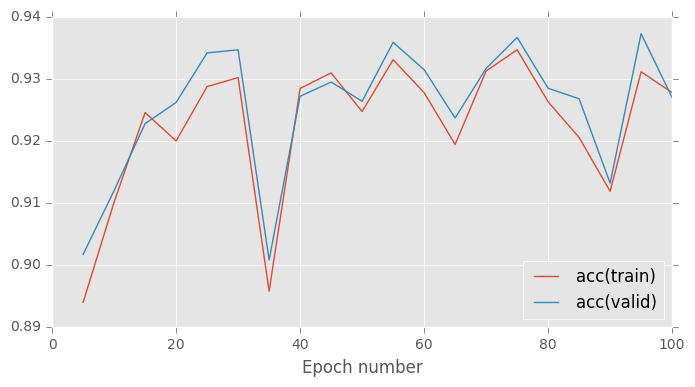

    final error(train) = 4.16e-01
    final error(valid) = 4.72e-01
    final acc(train)   = 9.28e-01
    final acc(valid)   = 9.27e-01
    run time per epoch = 2.33s


In [53]:

batch_size = 50  # number of data points in a batch
init_scale = 0.1  # scale for random parameter initialisation
learning_rates = [1e-04, 1e-03, 5e-03, 1e-02, 5e-02, 0.1]  # initial learning rate for gradient descent
num_epochs = 100 # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats


final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_train = []
final_accs_valid = []

for learning_rate in learning_rates:
    
    print('-' * 80)
    print('learning_rate={0:.4f}'
          .format(learning_rate))
    print('-' * 80)
    
    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    # Alter data-provider batch size
    train_data.batch_size = batch_size 
    valid_data.batch_size = batch_size

    input_dim, output_dim, hidden_dim = 784, 10, 100

    #Create a parameter initiliser 
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()

    learning_rule = RMSpropLearningRule(learning_rate=learning_rate)

    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval)
    fig1_name = 'error_with_RMSprop_{:1}.pdf'.format(learning_rate)
    print fig1_name
    fig2_name = 'acc_with_RMSprop_{:1}.pdf'.format(learning_rate)
    fig_1.savefig(fig1_name)
    fig_2.savefig(fig2_name)
    print fig1_name
    plt.show()
    
    print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
    print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
    print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
    print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
    print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])

In [54]:
j = 0
print('| LR  | final error(train) | final error(valid) | final acc(train) | final acc(valid) |')
print('|--------|--------------------|--------------------|------------------|------------------|')
for learning_rate in learning_rates:
    print('| {0:.4f}    | {1:.2e}           | {2:.2e}           |  {3:.4f}            | {4:.4f}           |'
          .format(learning_rate, 
                  final_errors_train[j], final_errors_valid[j],
                  final_accs_train[j], final_accs_valid[j]))
    j += 1

| LR  | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|--------|--------------------|--------------------|------------------|------------------|
| 0.0001    | 4.13e-02           | 9.23e-02           |  0.9890            | 0.9734           |
| 0.0010    | 7.41e-08           | 3.14e-01           |  1.0000            | 0.9757           |
| 0.0050    | 1.62e-04           | 5.04e-01           |  1.0000            | 0.9750           |
| 0.0100    | 6.38e-03           | 4.90e-01           |  0.9990            | 0.9760           |
| 0.0500    | 2.31e-01           | 3.65e-01           |  0.9609            | 0.9520           |
| 0.1000    | 4.16e-01           | 4.72e-01           |  0.9278            | 0.9270           |


In [ ]:

batch_size = 50  # number of data points in a batch
init_scale = 0.1  # scale for random parameter initialisation
learning_rates = 5e-3 #  learning rate 
num_epochs = 100 # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats

decay_rates = [0.1,0.2,0.5,0.9,0.99]

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_train = []
final_accs_valid = []

for learning_rate in learning_rates:
    
    print('-' * 80)
    print('learning_rate={0:.4f}'
          .format(learning_rate))
    print('-' * 80)
    
    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    # Alter data-provider batch size
    train_data.batch_size = batch_size 
    valid_data.batch_size = batch_size

    input_dim, output_dim, hidden_dim = 784, 10, 100

    #Create a parameter initiliser 
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()

    learning_rule = RMSpropLearningRule(learning_rate=learning_rate)

    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval)
    fig1_name = 'error_with_RMSprop_{:1}.pdf'.format(learning_rate)
    print fig1_name
    fig2_name = 'acc_with_RMSprop_{:1}.pdf'.format(learning_rate)
    fig_1.savefig(fig1_name)
    fig_2.savefig(fig2_name)
    print fig1_name
    plt.show()
    
    print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
    print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
    print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
    print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
    print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])